# Red Wine Quality Prediction Project

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing data set 
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In this Wine Dataset we have seen that 
1. There is total 12 columns out of which 11 columns are features or input variables and 1 column named Quality is the Label or Output Variavble.
2. DataSet has 1599 rows.

## Descriptive Analysis

In [3]:
# Looking or Data Types.
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [4]:
# Some basic information about this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Observation:
    1. dataset id pandas dataframe type
    2. Row ranges are from 0 to 1598
    3. 12 columns present out of which 11 columns are float data types i.e. these data are continuous data. and 1 data is integer data.
    4. there is no null value present.

In [5]:
# looking for null value present
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

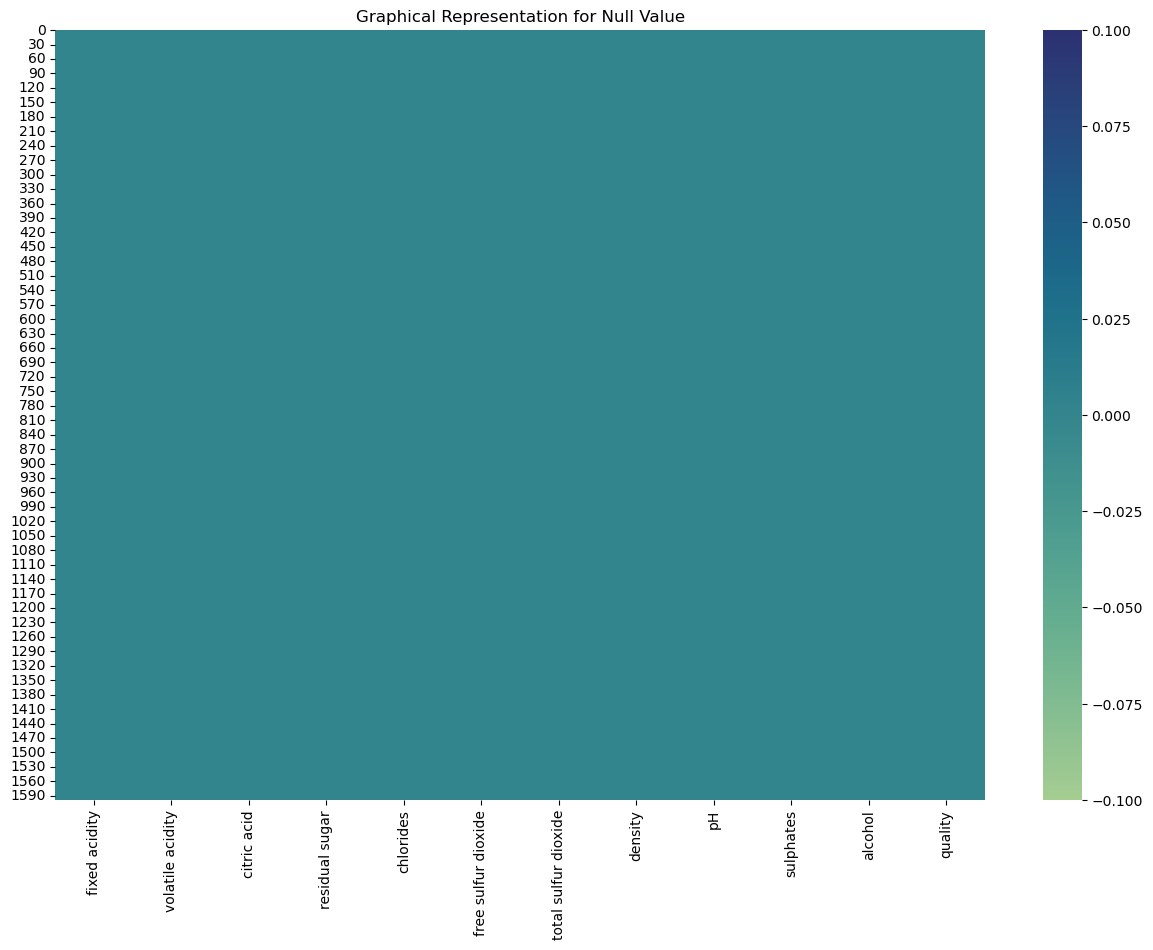

In [6]:
# graphical representation of null value present inside any column
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(), cmap="crest")
plt.title("Graphical Representation for Null Value")
plt.show()

As there are no color difference in the heatmap that represents there are no null value present

In [7]:
# name of columns
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
# No of unique data present inside the dataframe in each columns.
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [9]:
# looking for value colunts in each columns
for column in df.columns:
    print("Column Name :", column)
    print(df[column].value_counts())
    print("\n-------------------------\n")


Column Name : fixed acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64

-------------------------

Column Name : volatile acidity
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64

-------------------------

Column Name : citric acid
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64

-------------------------

Column Name : residual sugar
2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64

-------------------------

Column Name : chlorides
0.080    66
0.074    55
0.076    51

Observation: In each features there are continuous data present but in Quality (Label) column there are 6 unique value which means although these data are numerical data but these are ordinal data and in the question we have seen that ther quality of wine varies from 0 to 10. 

In [10]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

Observation:
1. Count of every column is same i.e. no null value in the dataset.
2. In fixed acidity, residual sugar, free sulfur dioxide, total sulfur dioxide ,Sulphates column mean is greater than 50th percentile value. i.e. it is the case of right skewness. 
3. difference between the 75th percentile and max value is comparatibly high in fixed acidity column, critic acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates columns  which indicates there might be outliers present.
4. in the df.describe method we have counts, mean, standard deviation, minimum value, 25th percentile, 50th percentile or median,75th percentile, and maximum value.

In [11]:
# checking for good quality wine where 'good'=1 and 'not good' = 0 
df["good quality"]= [1 if i>=7 else 0 for i in df['quality']]
df.sample(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
732             7.3             0.835         0.03             2.1      0.092   
234             8.2             1.000         0.09             2.3      0.065   
1507            7.5             0.380         0.57             2.3      0.106   
521             7.6             0.410         0.49             2.0      0.088   
1353            7.6             0.645         0.03             1.9      0.086   
1291            8.2             0.635         0.10             2.1      0.073   
22              7.9             0.430         0.21             1.6      0.106   
322             7.8             0.620         0.05             2.3      0.079   
655             9.7             0.550         0.17             2.9      0.087   
432            11.9             0.370         0.69             2.3      0.078   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
732                  10.0                  19.0  0.99660  3.39       0.47   
234                   7.0                  37.0  0.99685  3.32       0.55   
1507                  5.0                  12.0  0.99605  3.36       0.55   
521                  16.0                  43.0  0.99800  3.48       0.64   
1353                 14.0                  57.0  0.99690  3.37       0.46   
1291                 25.0                  60.0  0.99638  3.29       0.75   
22                   10.0                  37.0  0.99660  3.17       0.91   
322                   6.0                  18.0  0.99735  3.29       0.63   
655                  20.0                  53.0  1.00040  3.14       0.61   
432                  12.0                  24.0  0.99580  3.00       0.65   

      alcohol  quality  good quality  
732       9.6        5             0  
234       9.0        6             0  
1507     11.4        6             0  
521       9.1        5             0  
1353     10.3        5             0  
1291     10.9        6             0  
22        9.5        5             0  
322       9.3        5             0  
655       9.4        5             0  
432      12.8        6             0

In [12]:
df["good quality"].value_counts()

0    1382
1     217
Name: good quality, dtype: int64

as in 'good quality' column there are good product are 217 in quantity and not good product are 1382 in quantity hence this is the case of class imbalance. for that we may use SMOTE, CNN resampling methods.

## Data Visualization

#### 1. Univariate analysis

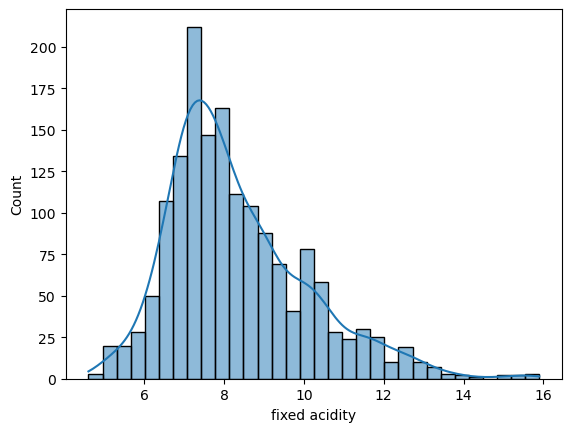

In [14]:
sns.histplot(data=df, x='fixed acidity', kde=True, palette='blue')
plt.show()

observation: right skewness present in the fixed acidity column. most of the value present from 6 to 11 

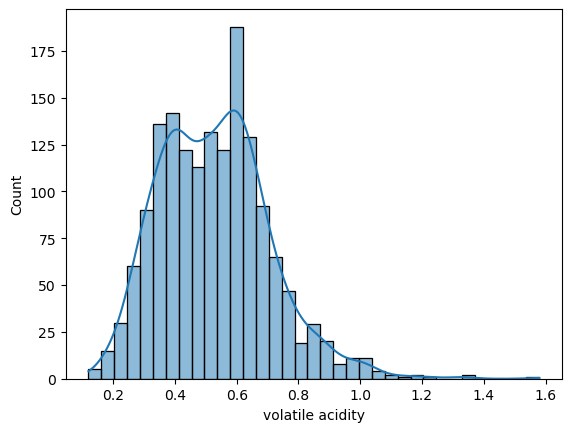

In [15]:
sns.histplot(data=df, x='volatile acidity', kde= True, palette= "cyan")
plt.show()

data points are normaly distributed. and most of the datapoints lies from 0.3 to 0.8. 

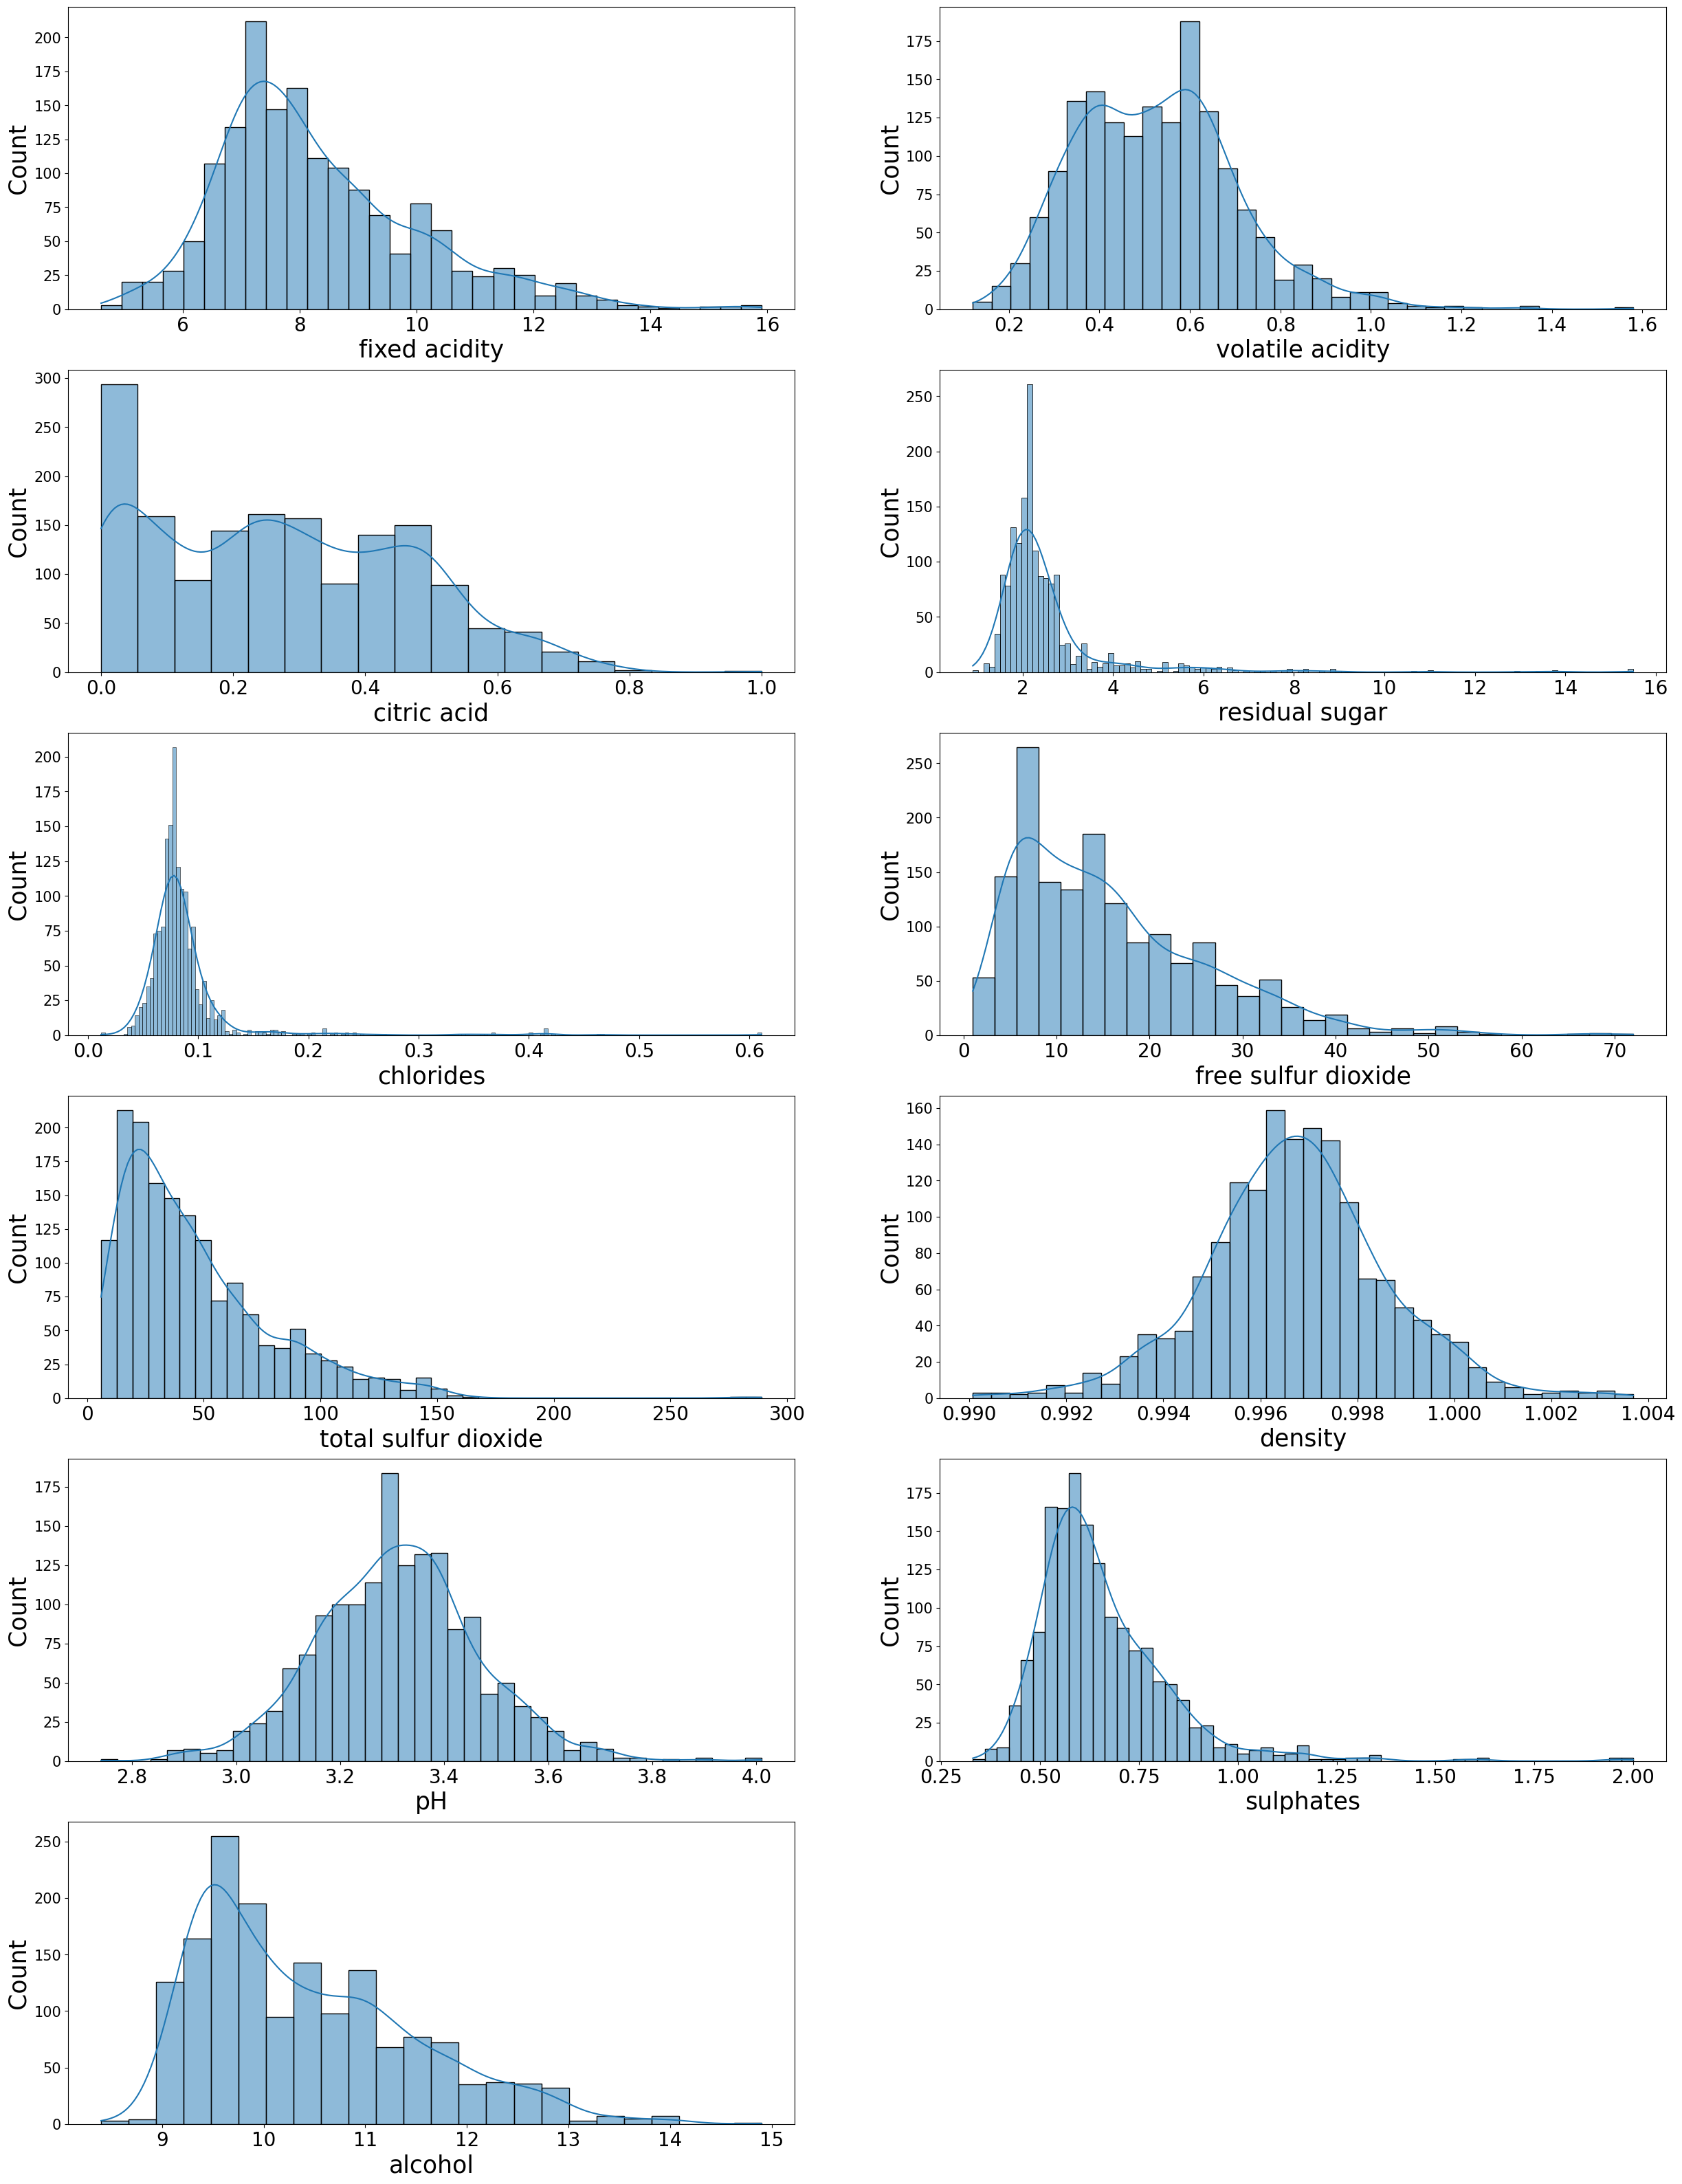

In [16]:
plt.figure(figsize=(30,40))

plot_number=1

for i in range(len(df.columns)):
    if plot_number<=11:
        plt.subplot(6,2, plot_number)
        sns.histplot(data=df, x=df.columns[i], kde=True, palette="skyblue")
        plt.xlabel(df.columns[i], fontsize=25)
        plt.ylabel("Count", fontsize=25)
        plt.xticks(rotation=0,fontsize=20)
        plt.yticks(rotation=0,fontsize=15)
    plot_number+=1
plt.show()

observations: Every columns are normally distributed except free sulfur dioxide, total sulfer oxide and alcohal column.

<AxesSubplot:xlabel='fixed acidity'>

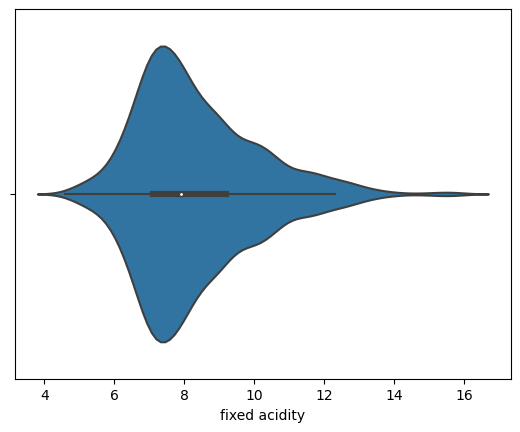

In [17]:
sns.violinplot(data=df,x="fixed acidity")

<AxesSubplot:xlabel='volatile acidity'>

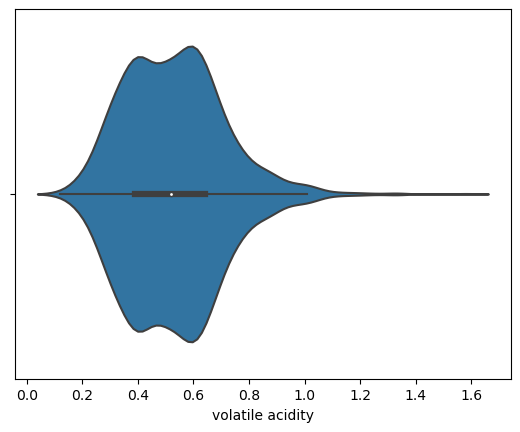

In [18]:
sns.violinplot(data=df, x=df.columns[1])

<AxesSubplot:xlabel='total sulfur dioxide'>

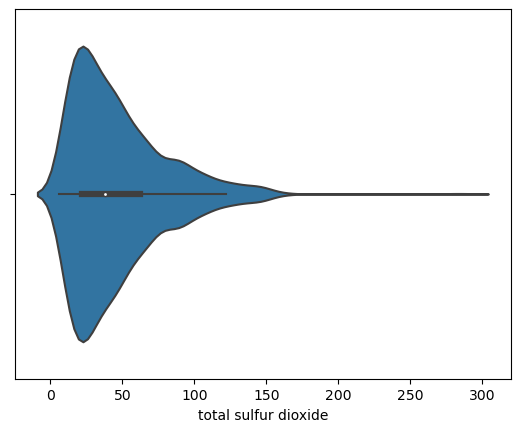

In [19]:
sns.violinplot(data=df,x=df.columns[6])

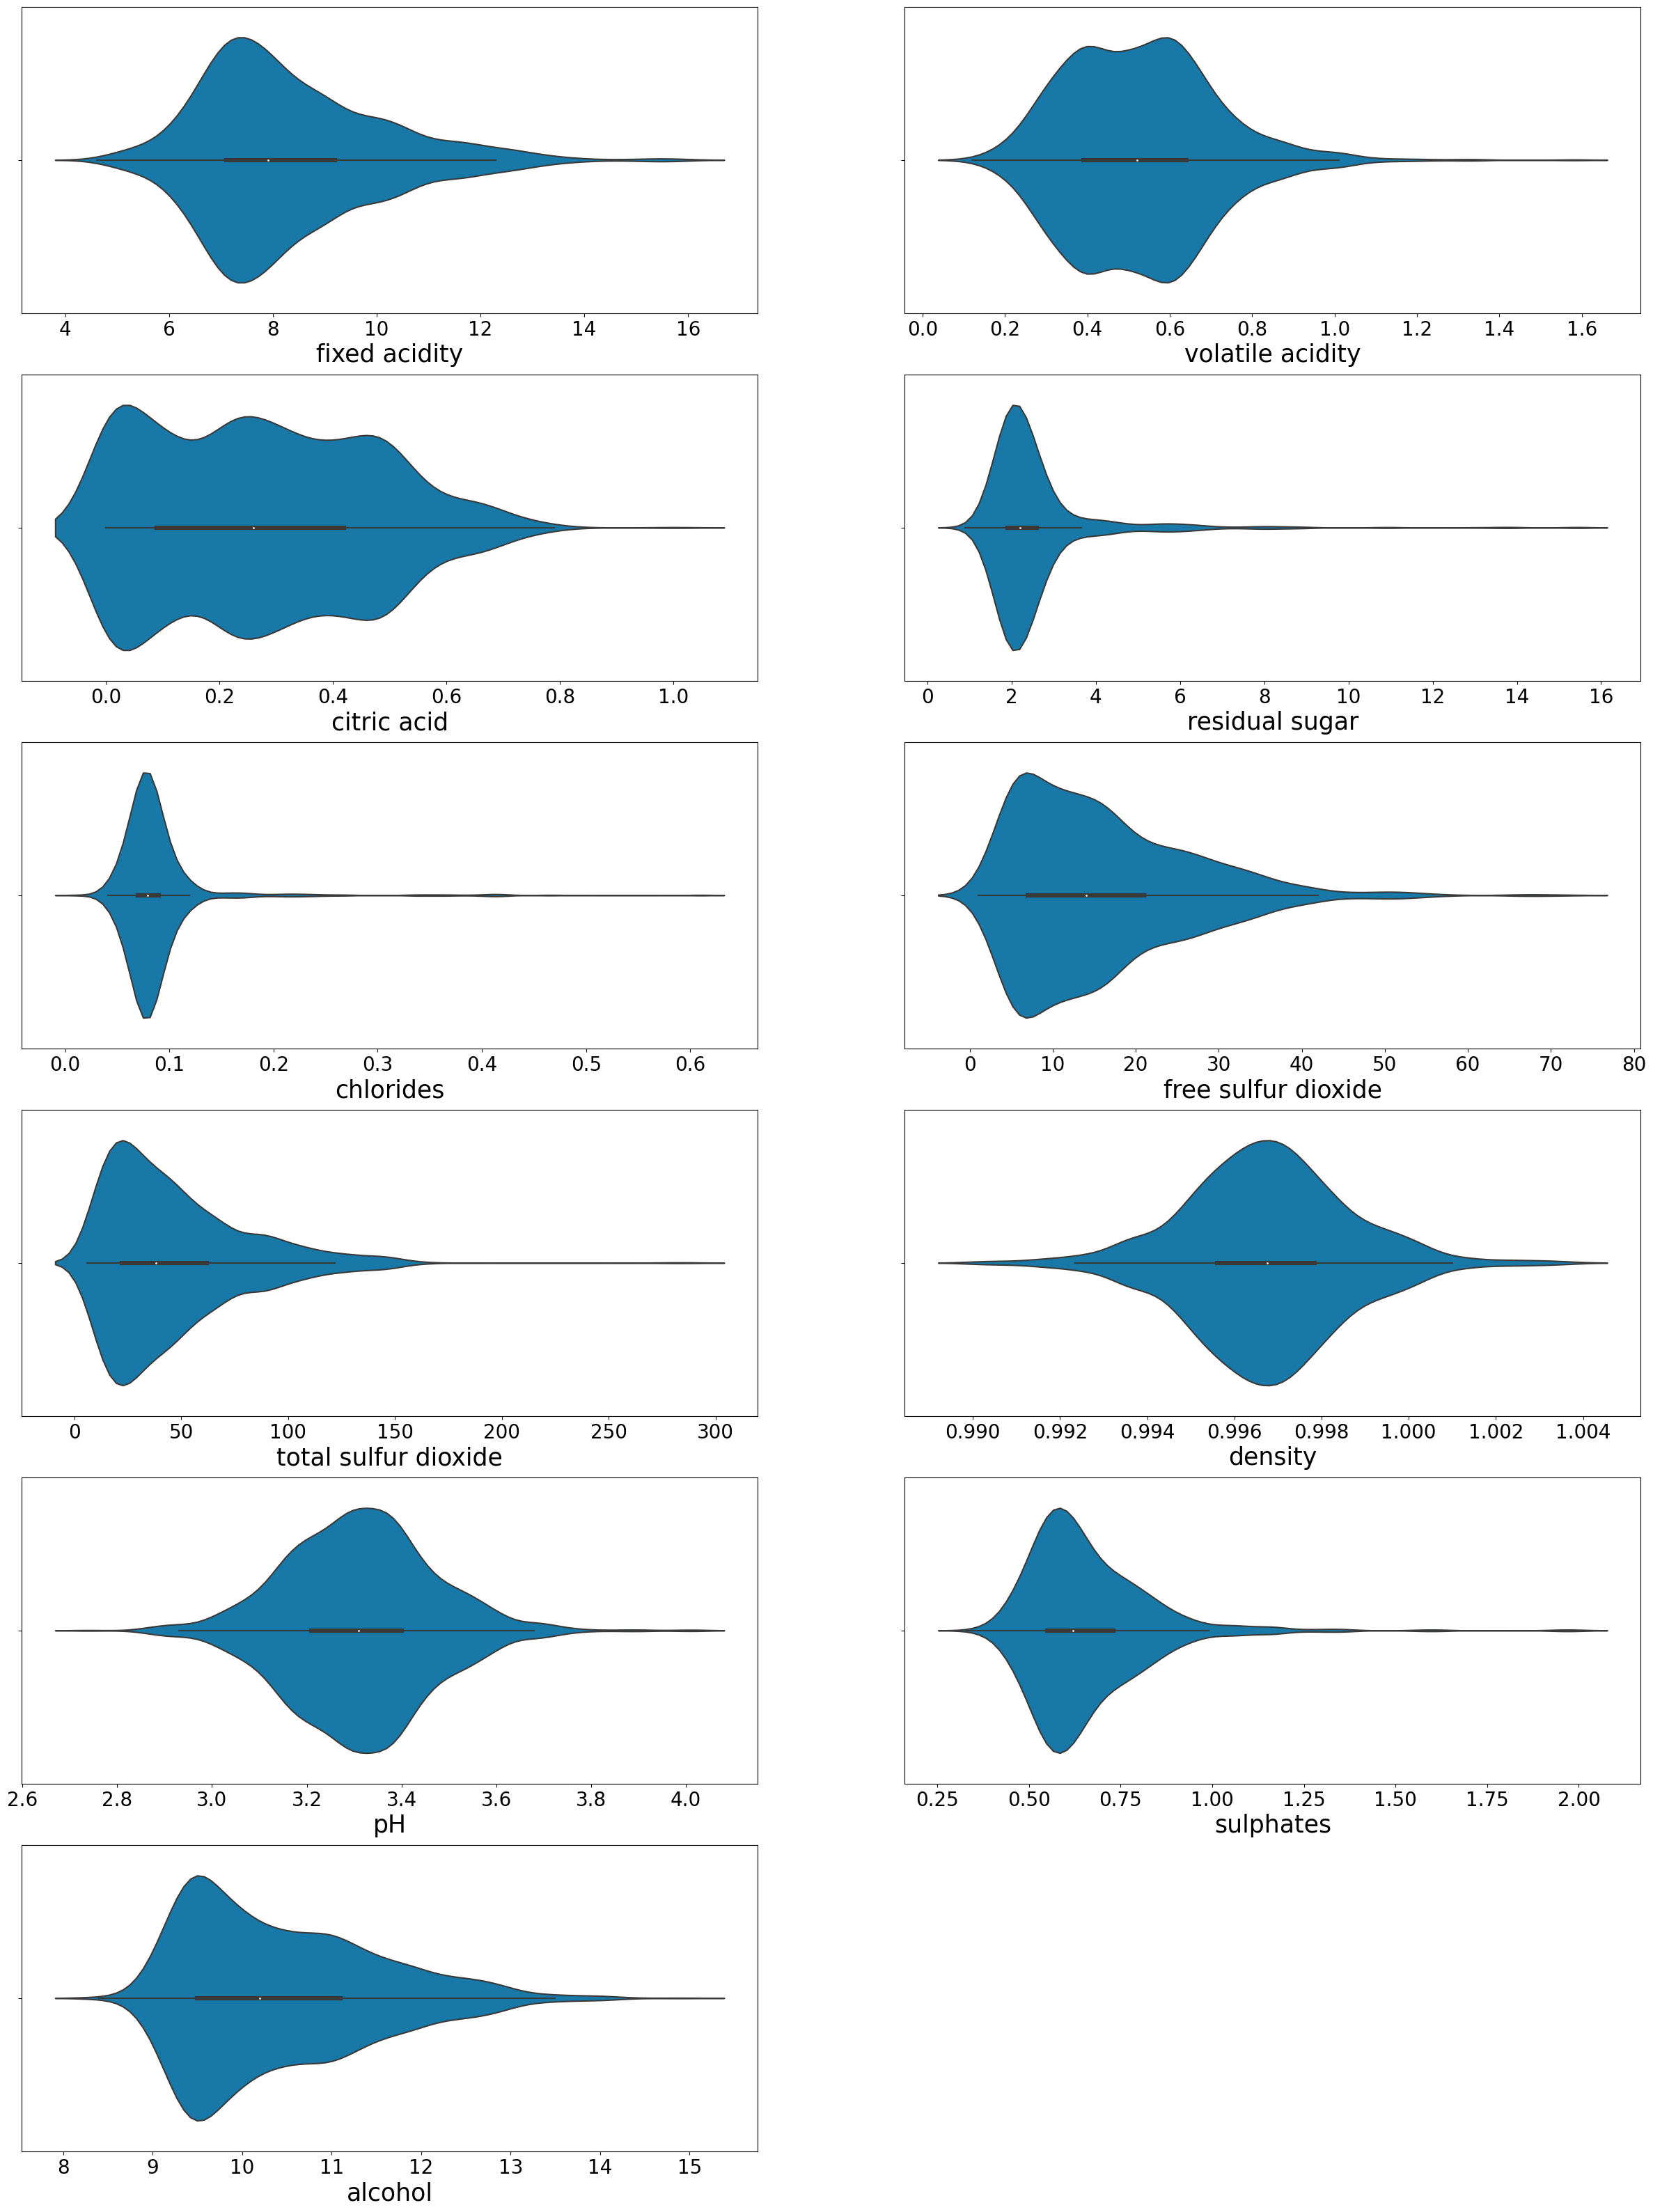

In [20]:
plt.figure(figsize=(30,40))

plot_number=1

for i in range(len(df.columns)):
    if plot_number<=11:
        plt.subplot(6,2, plot_number)
        sns.violinplot(data=df, x=df.columns[i],palette="winter")
        plt.xlabel(df.columns[i], fontsize=25)
        plt.xticks(rotation=0,fontsize=20)
    plot_number+=1
plt.show()

in this violinplot we can notice the maximum width allocation and its range in any columns.

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


<AxesSubplot:xlabel='quality', ylabel='count'>

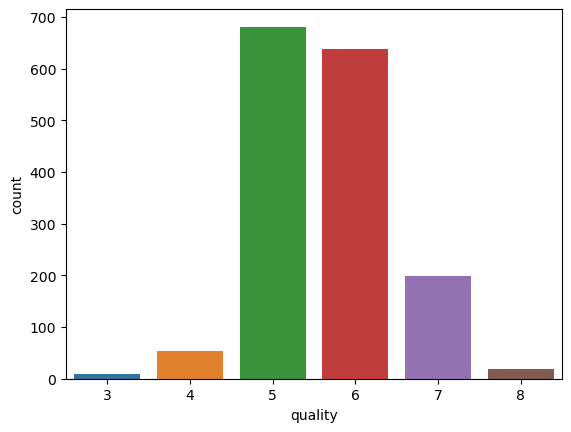

In [21]:
print(df['quality'].value_counts())
sns.countplot(data=df, x='quality')

most of the customer having high tendency to buy wine of quality 5,6 and 7. there are very few customer for the high quality of 8 and also of low quality of 3 and 4.

0    1382
1     217
Name: good quality, dtype: int64


<AxesSubplot:xlabel='good quality', ylabel='count'>

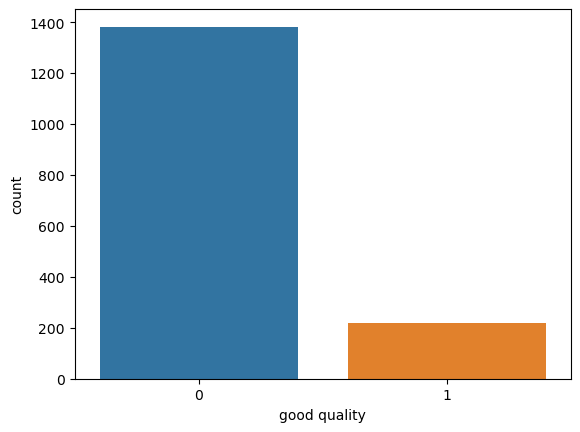

In [22]:
print(df['good quality'].value_counts())
sns.countplot(data=df, x='good quality')

there are very less consumers of good quality wine as compared to bad quality wine

#### Bivariate Analysis

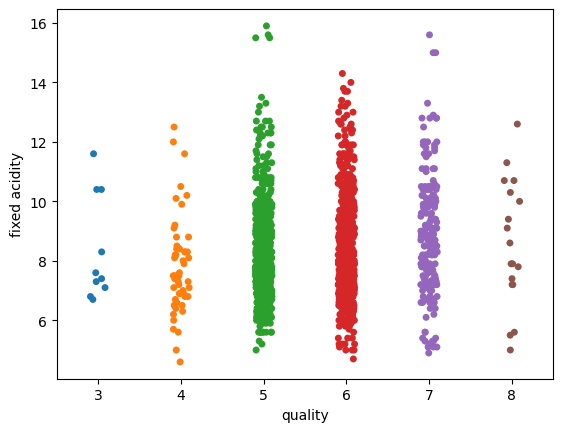

In [23]:
sns.stripplot(data=df, x= "quality", y="fixed acidity")
plt.show()

strip plot shows that most of the customer consumes the wine of 5,6,and 7 quality. there is no such relation found in stripplot with fixed acidity.

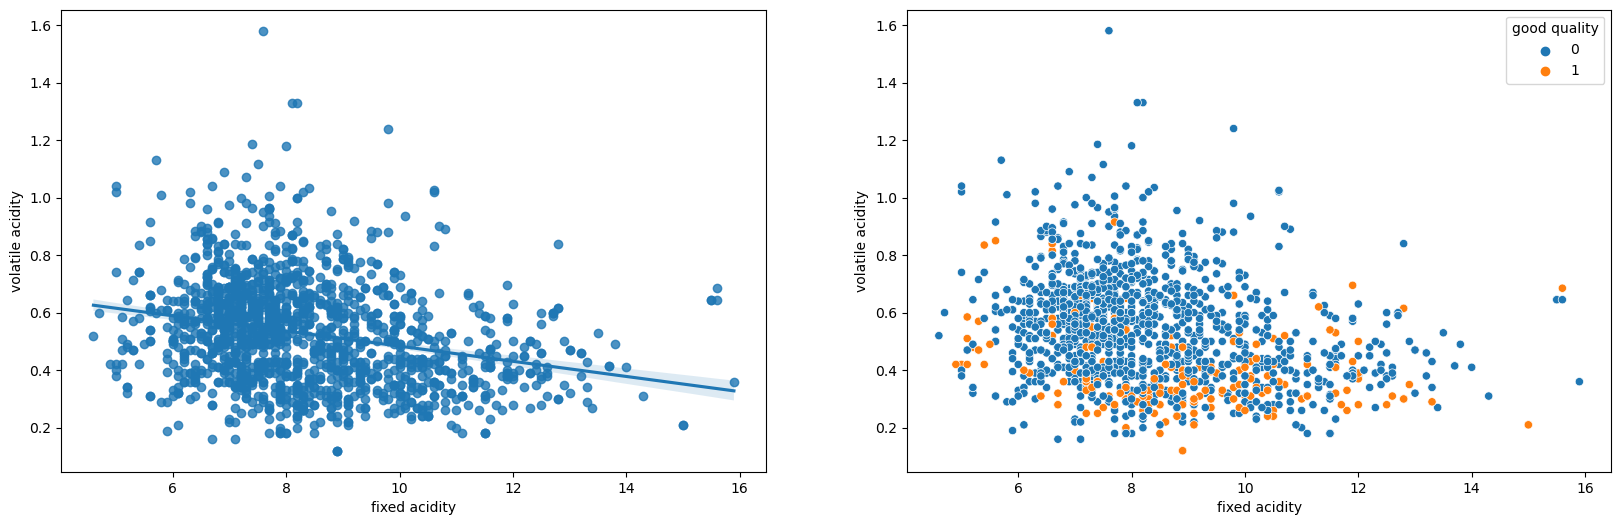

In [24]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.regplot(data=df, y='volatile acidity', x='fixed acidity')


plt.subplot(1,2,2)
sns.scatterplot(data=df, x='fixed acidity', y='volatile acidity', hue='good quality')

plt.show()

good quality wine have less volatile acidity.

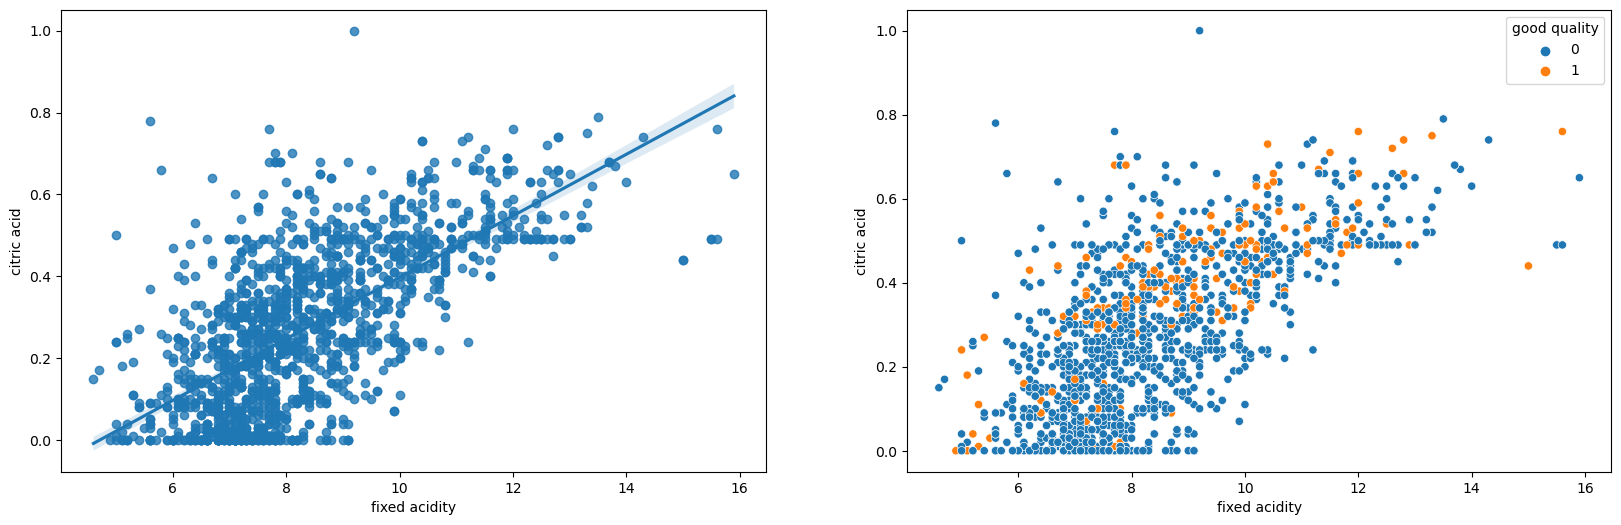

In [25]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.regplot(data=df, x='fixed acidity', y='citric acid')
plt.subplot(1,2,2)
sns.scatterplot(data=df, x='fixed acidity', y='citric acid', hue='good quality')
plt.show()

the best fit line of regression plot shows that there is strong positive relation between citric acidity and fixed acidity. at the same time scatter plot shows that good quality wine have high quantity of citric acis

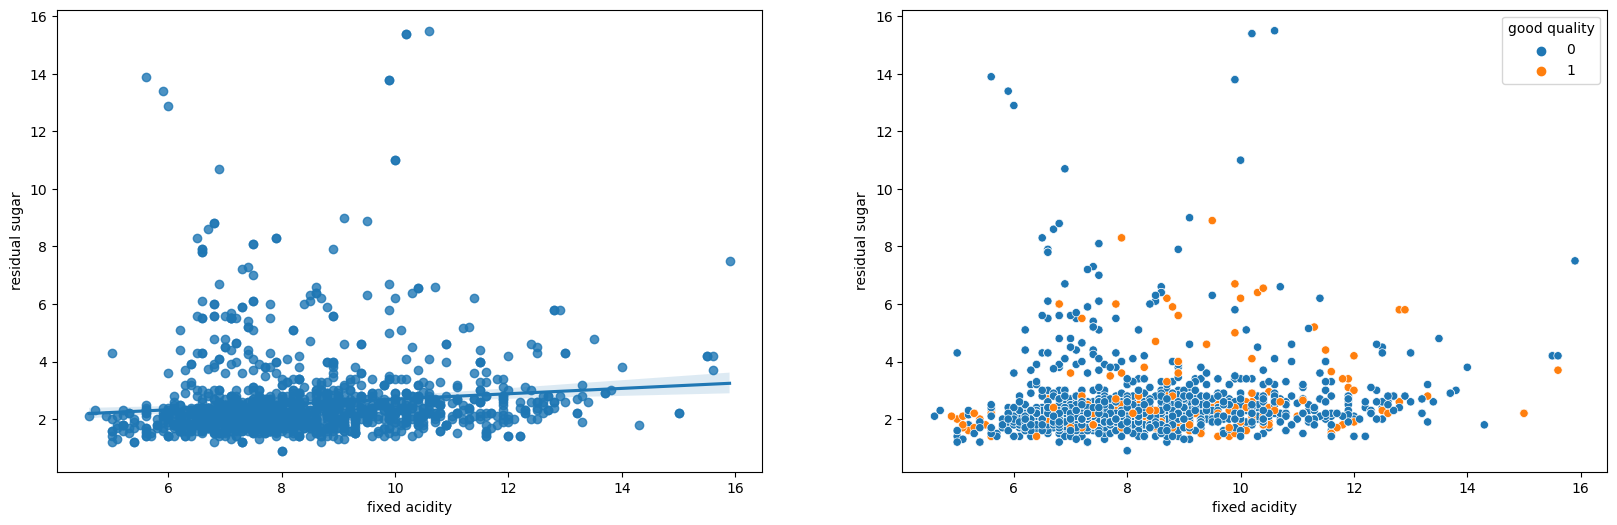

In [26]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.regplot(data=df, x='fixed acidity', y='residual sugar')
plt.subplot(1,2,2)
sns.scatterplot(data=df, x='fixed acidity', y='residual sugar', hue='good quality')
plt.show()

there is no such positive relation between residual sugar and fixed acidity. but most of the wine have less residual sugar.

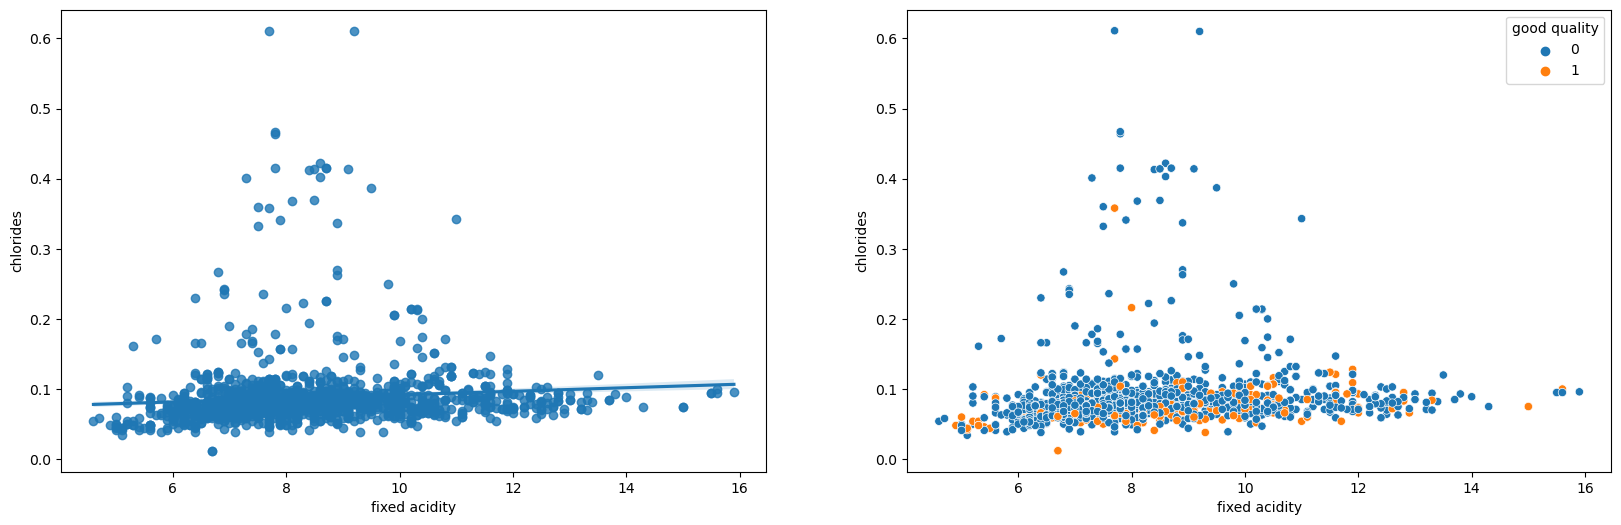

In [27]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.regplot(data=df, x='fixed acidity', y='chlorides')
plt.subplot(1,2,2)
sns.scatterplot(data=df, x='fixed acidity', y='chlorides', hue='good quality')
plt.show()

There is no such positive relation between chlorides and fixed acidity. most of the wine have less chlorides.

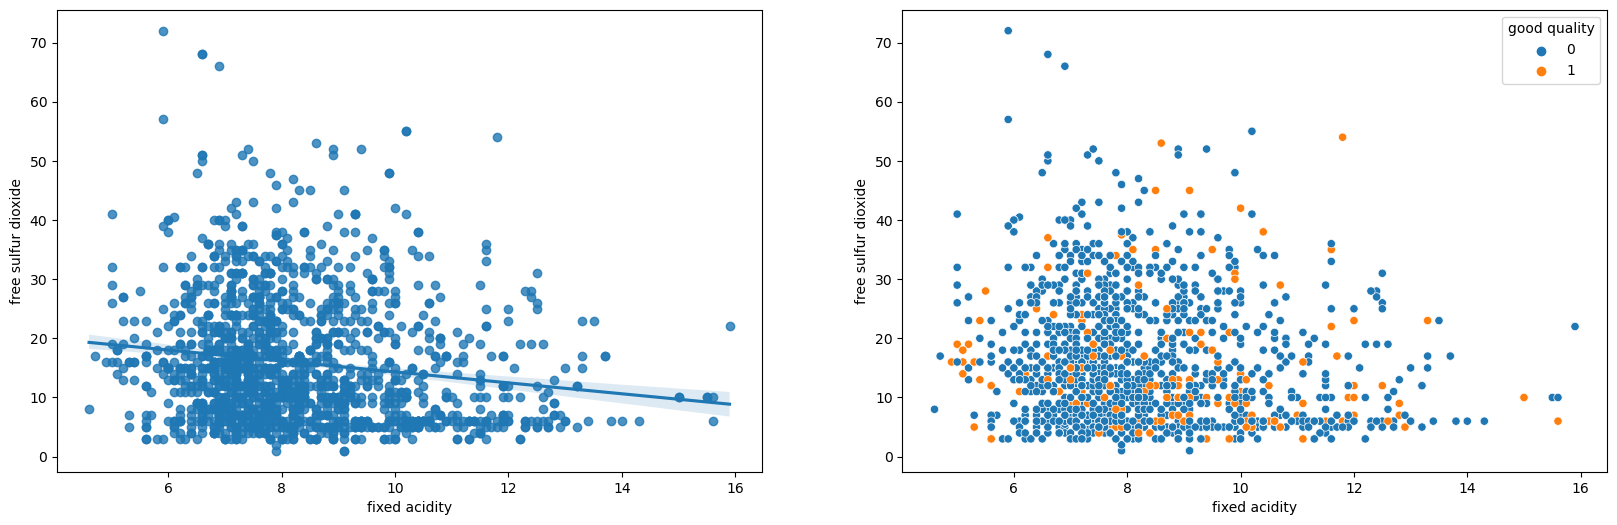

In [28]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.regplot(data=df, x='fixed acidity', y='free sulfur dioxide')
plt.subplot(1,2,2)
sns.scatterplot(data=df, x='fixed acidity', y='free sulfur dioxide', hue='good quality')
plt.show()

There is slight negative relation between fixed acidity and free sulfur dioxide. interms of good quality wine we can not conclude anything in the scatterplot.

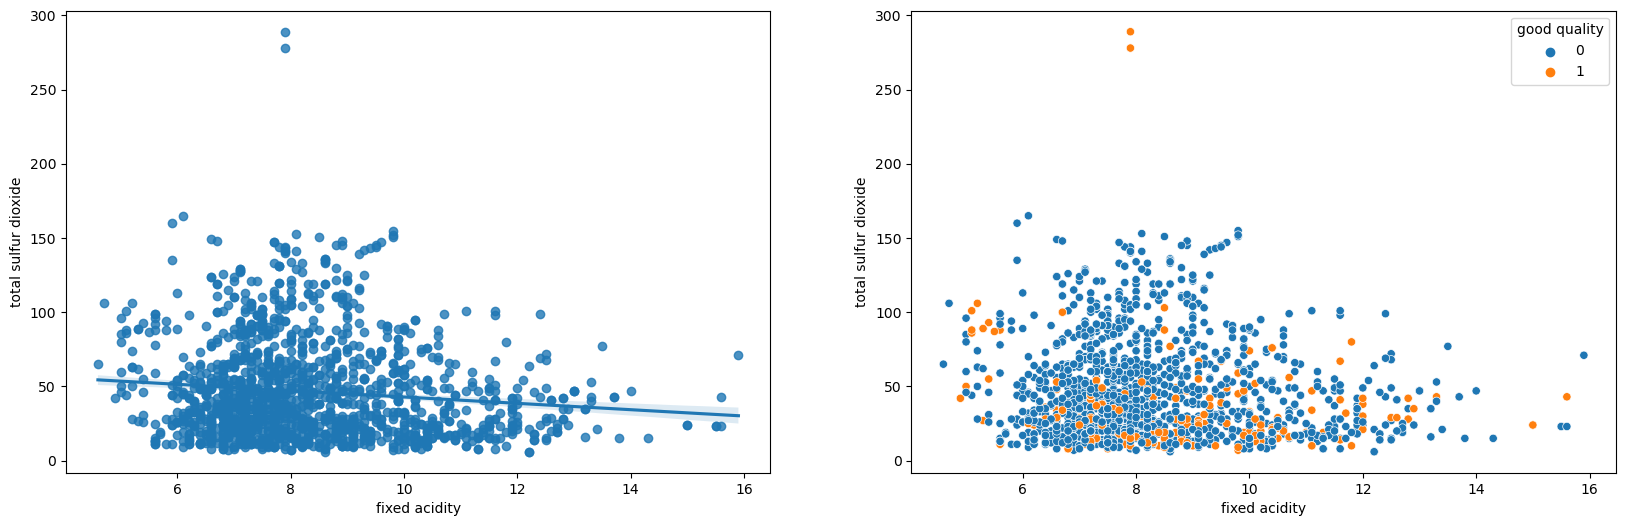

In [29]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.regplot(data=df, x='fixed acidity', y='total sulfur dioxide')
plt.subplot(1,2,2)
sns.scatterplot(data=df, x='fixed acidity', y='total sulfur dioxide', hue='good quality')
plt.show()

There is not such relation between total sugar dioxide. and from scatter plot we cannot conclude anything about goodness of quality. 

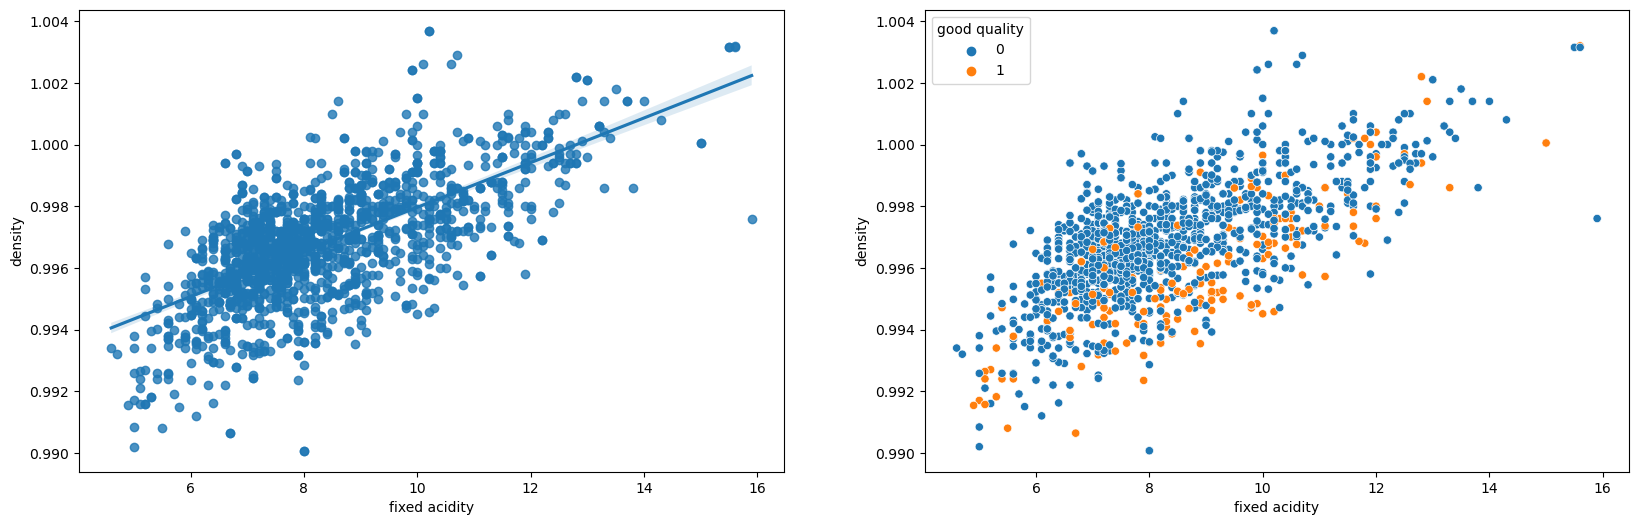

In [30]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.regplot(data=df, x='fixed acidity', y='density')
plt.subplot(1,2,2)
sns.scatterplot(data=df, x='fixed acidity', y='density', hue='good quality')
plt.show()

There is strong positive relation between density and fixed acidity.

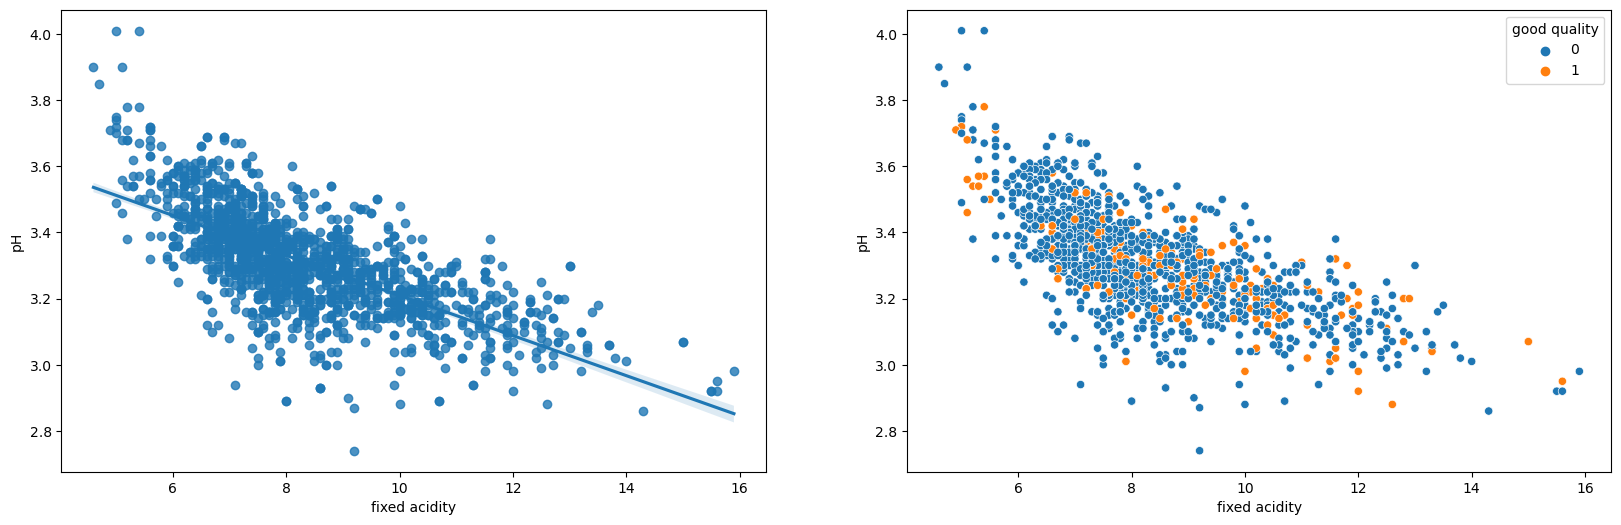

In [31]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.regplot(data=df, x='fixed acidity', y='pH')
plt.subplot(1,2,2)
sns.scatterplot(data=df, x='fixed acidity', y='pH', hue='good quality')
plt.show()

There is negative relation between pH and fixed acidity.

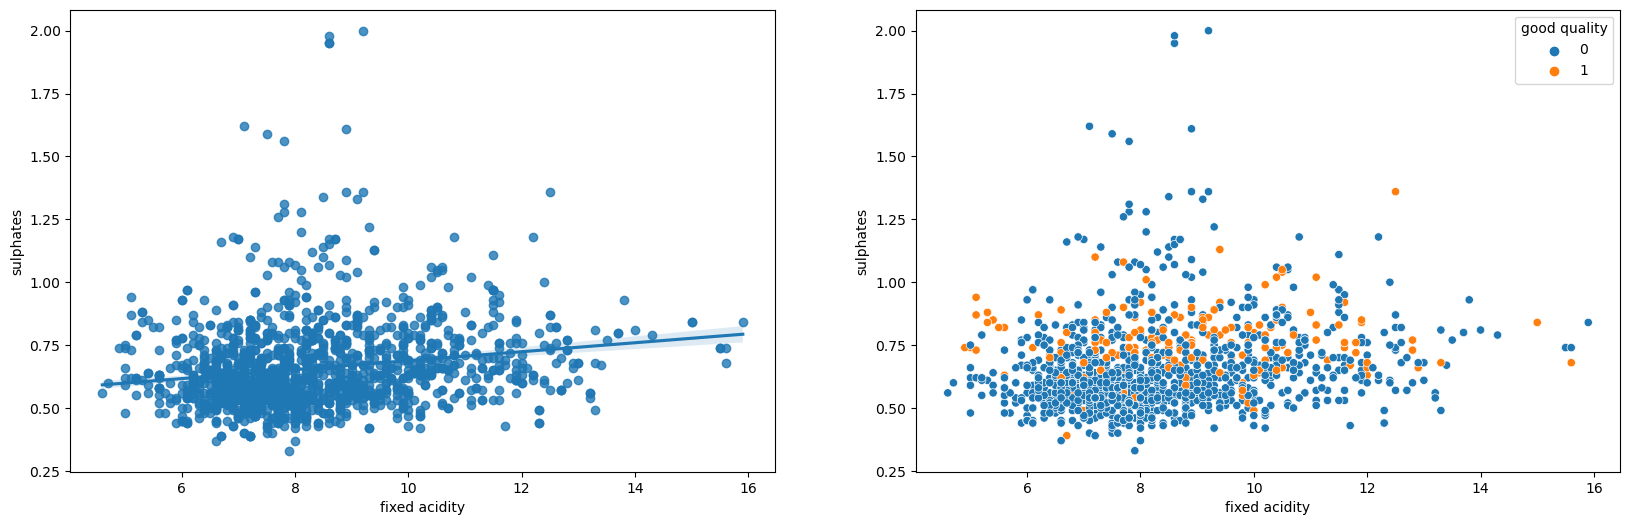

In [32]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.regplot(data=df, x='fixed acidity', y='sulphates')
plt.subplot(1,2,2)
sns.scatterplot(data=df, x='fixed acidity', y='sulphates', hue='good quality')
plt.show()

There is slight positive relation between sulphates and fixed acidity althow slope is not that much high. and from scatterplot we can conclude that in good quality wine have higher value of sulphates.

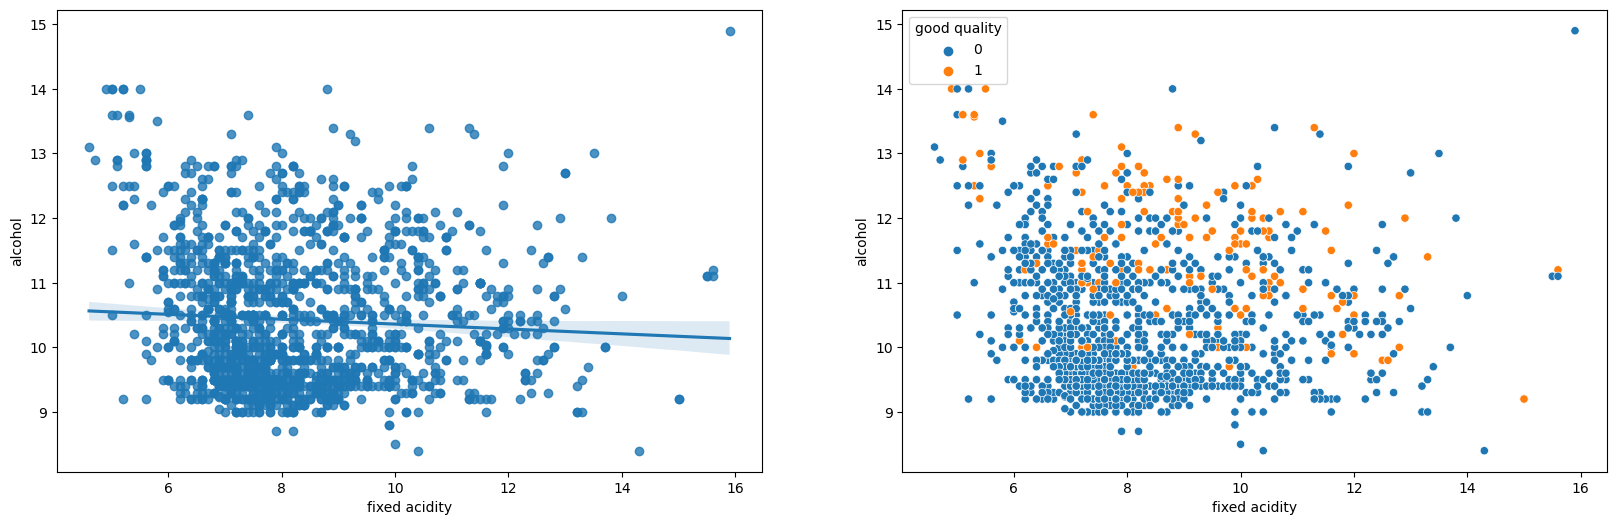

In [33]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.regplot(data=df, x='fixed acidity', y='alcohol')
plt.subplot(1,2,2)
sns.scatterplot(data=df, x='fixed acidity', y='alcohol', hue='good quality')
plt.show()

There is no such relation between alcohal and fixed acidity. and fron the scatterplot we found that good quality wine have higher value of alcohal.

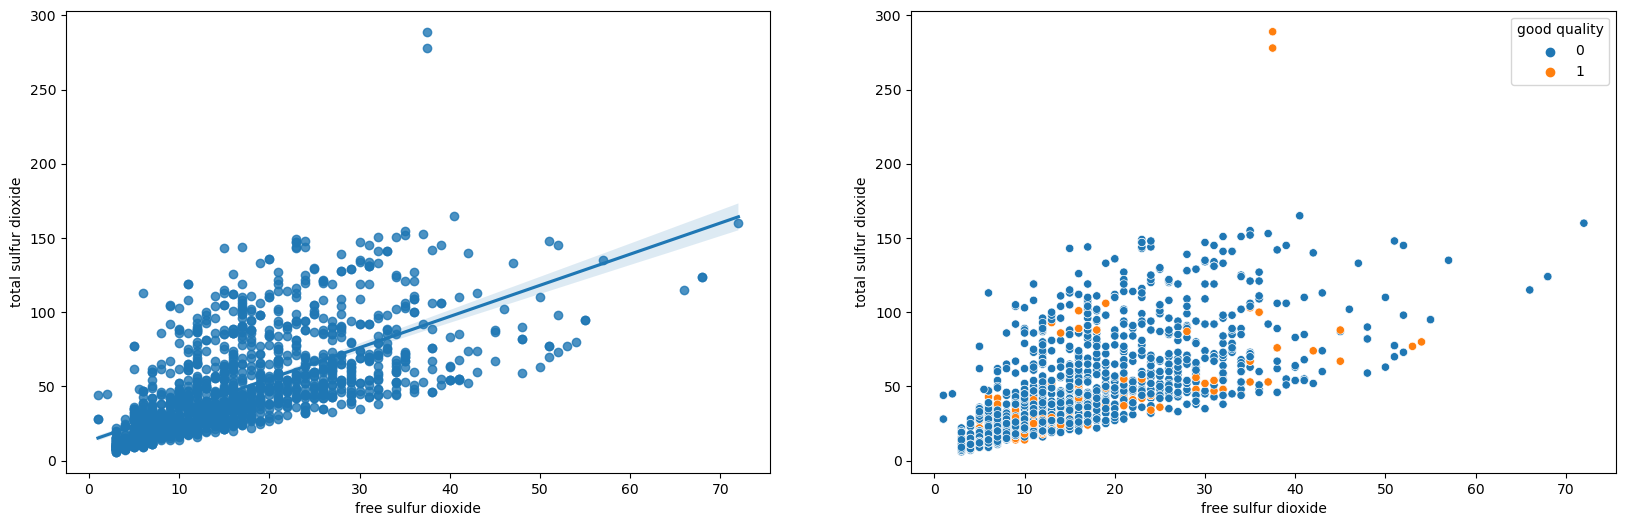

In [34]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.regplot(data=df, x='free sulfur dioxide', y='total sulfur dioxide')
plt.subplot(1,2,2)
sns.scatterplot(data=df, x='free sulfur dioxide', y='total sulfur dioxide', hue='good quality')
plt.show()

There is positive relation between total sulfur dioxide and free sulfur dioxide.

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

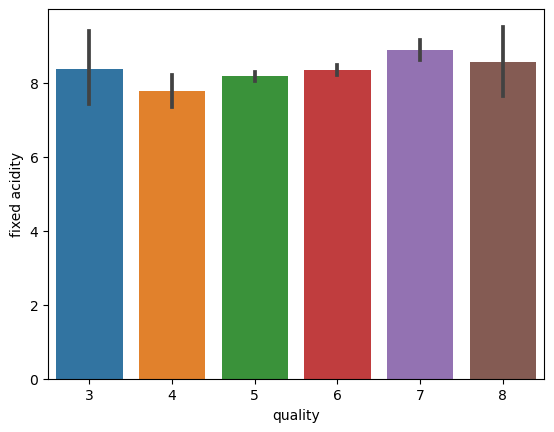

In [35]:
sns.barplot(data=df, x='quality', y='fixed acidity')

fixed acidity is almost same in every quality of wine.

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

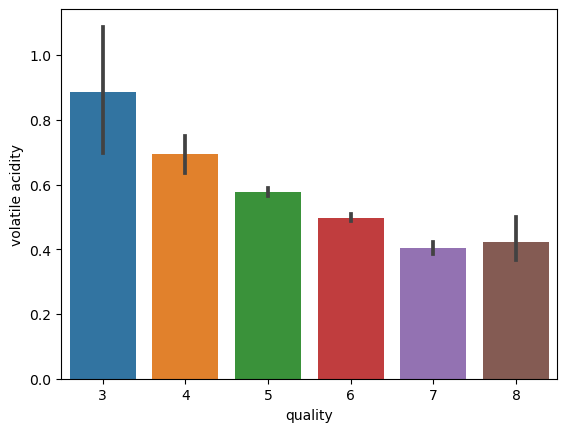

In [36]:
sns.barplot(data=df, x='quality', y='volatile acidity')

Volatile acidity is higher side in lower quality wine. 

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

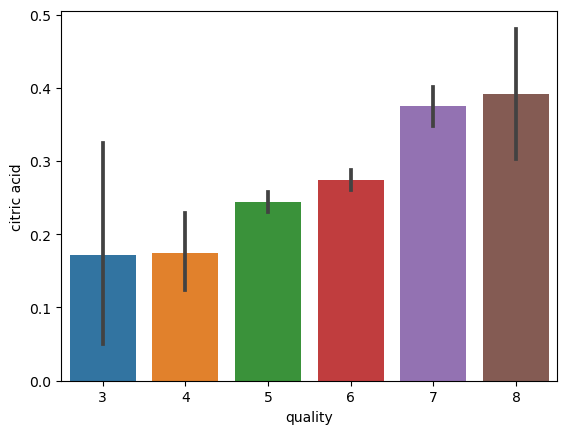

In [37]:
sns.barplot(data=df, x='quality', y='citric acid')

citric acid is higher side in good quality wine.

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

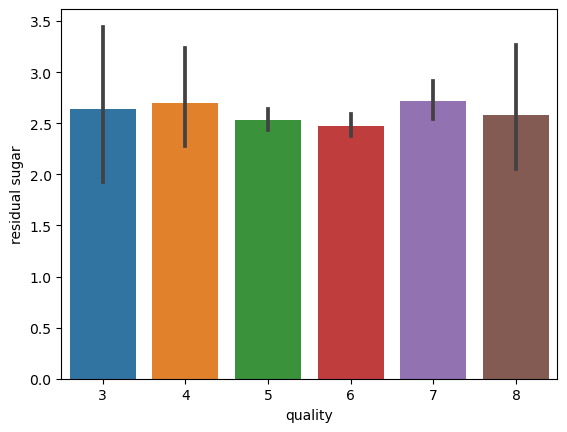

In [38]:
sns.barplot(data=df, x='quality', y='residual sugar')

residual sugar is almost same in every quality wine.

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

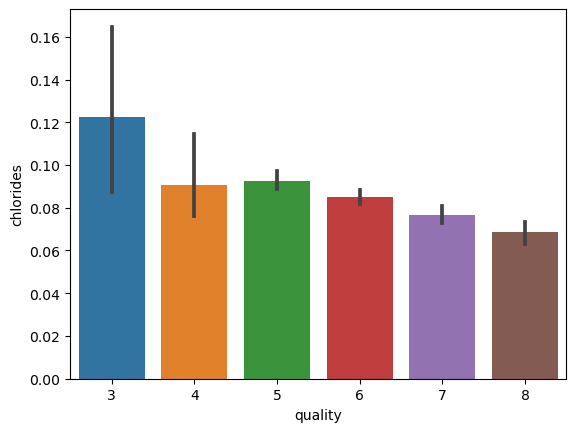

In [39]:
sns.barplot(data=df, x='quality', y='chlorides')

good quality wine have lower chlorides.

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

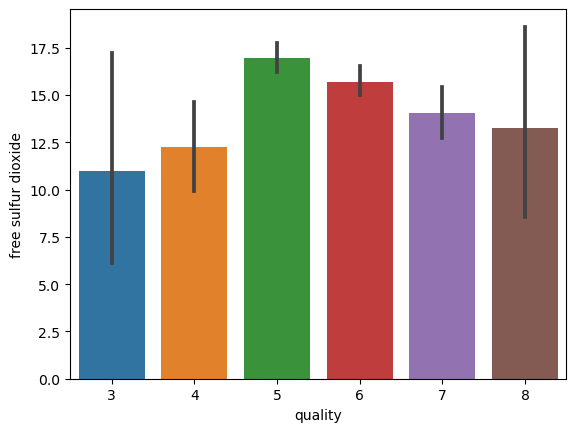

In [41]:
sns.barplot(data=df, x='quality', y='free sulfur dioxide')

Free sulfur dioxide is higher in 5 an 6 quality wine.

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

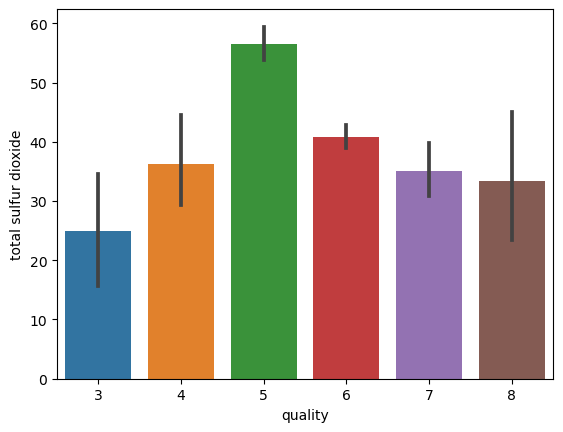

In [42]:
sns.barplot(data=df, x='quality', y='total sulfur dioxide')

there is total sulfur dioxide is higher side in the quality of 4,5,6 and 7. 

<AxesSubplot:xlabel='quality', ylabel='pH'>

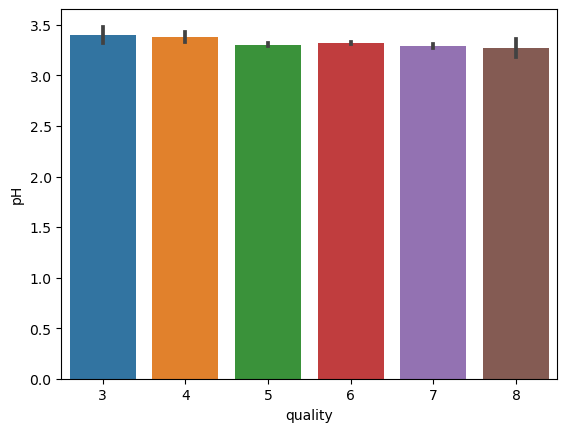

In [43]:
sns.barplot(data=df, x='quality', y='pH')

Almost same ph lavel is maintained in all quality wine.

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

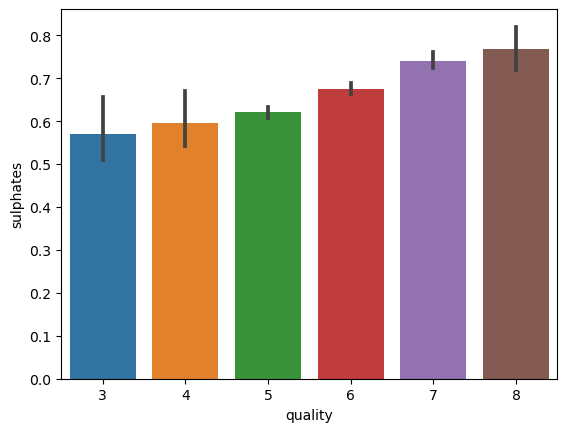

In [44]:
sns.barplot(data=df, x='quality', y='sulphates')

Sulphates are higher side in good quality wine.

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

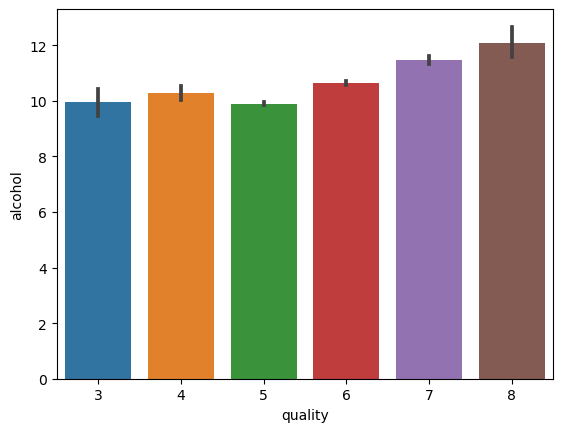

In [45]:
sns.barplot(data=df, x='quality', y='alcohol')

almost same level of alcohal is maintained in all quality wine.

In [46]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'good quality'],
      dtype='object')

#### MultiVariate Analysis

<Figure size 10000x10000 with 0 Axes>

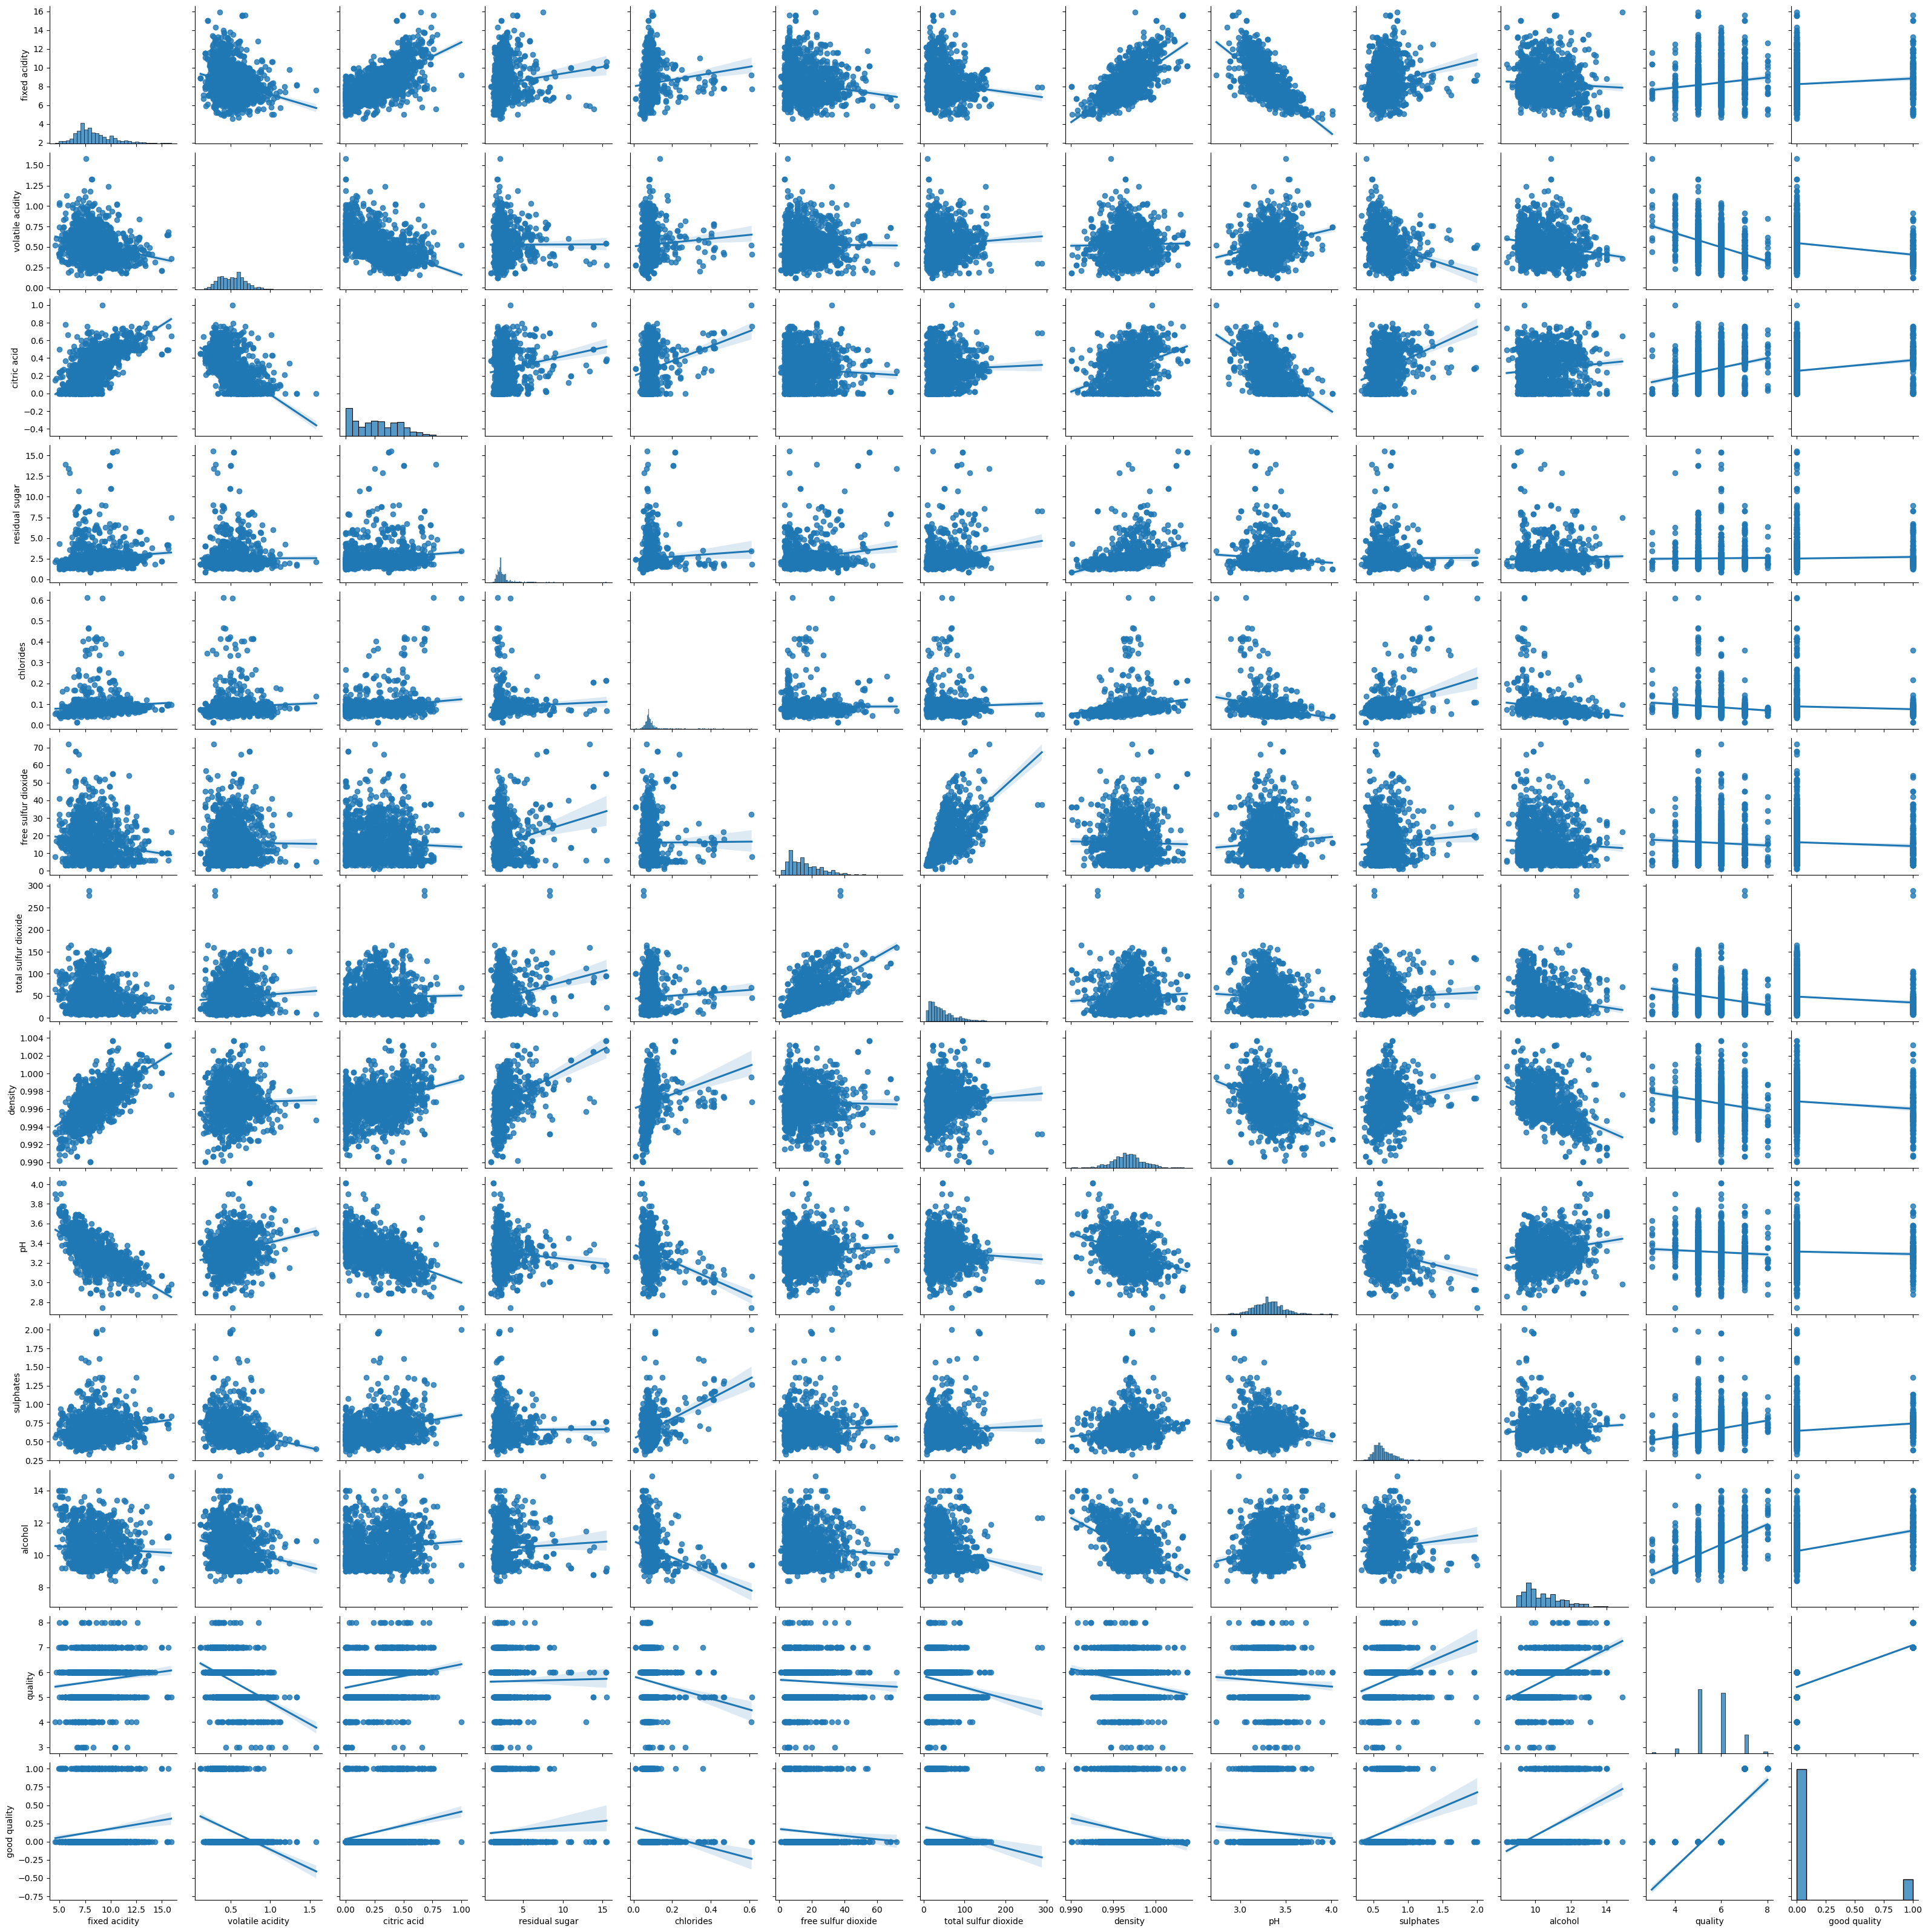

In [47]:
plt.figure(figsize=(100,100))
sns.pairplot(df, kind='reg')
plt.show()

### Data Preprocessing

##### Checking for outliers

<AxesSubplot:ylabel='fixed acidity'>

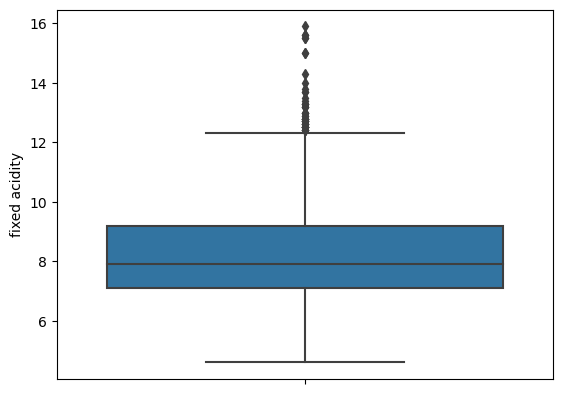

In [48]:
sns.boxplot(data=df, y='fixed acidity')

<AxesSubplot:ylabel='volatile acidity'>

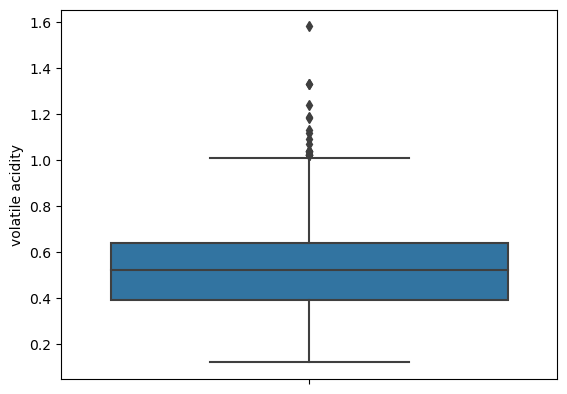

In [49]:
sns.boxplot(data=df, y='volatile acidity')

<AxesSubplot:ylabel='citric acid'>

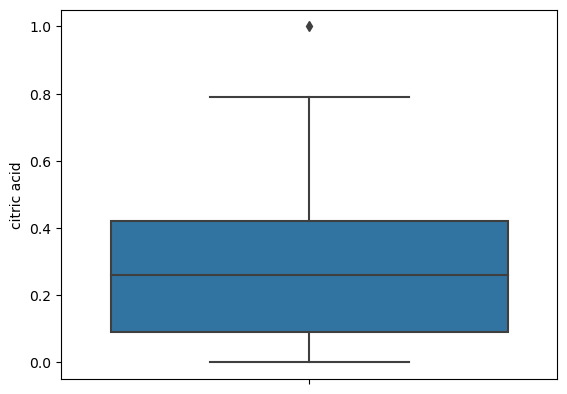

In [50]:
sns.boxplot(data=df, y='citric acid')

<AxesSubplot:ylabel='residual sugar'>

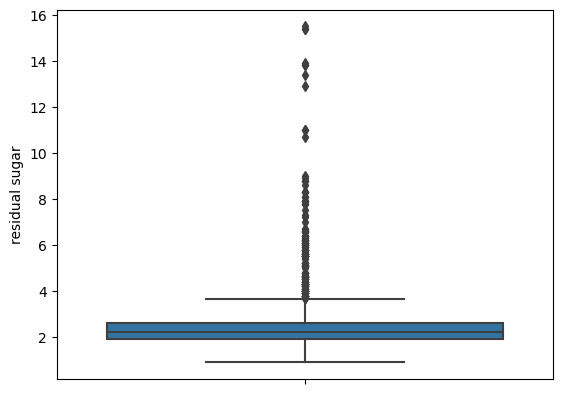

In [51]:
sns.boxplot(data=df, y='residual sugar')

<AxesSubplot:ylabel='chlorides'>

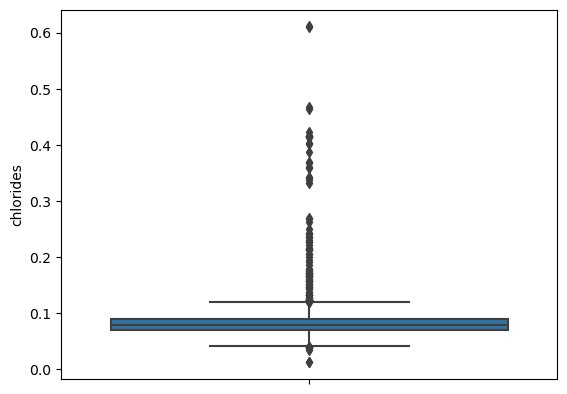

In [52]:
sns.boxplot(data=df, y='chlorides')

<AxesSubplot:ylabel='free sulfur dioxide'>

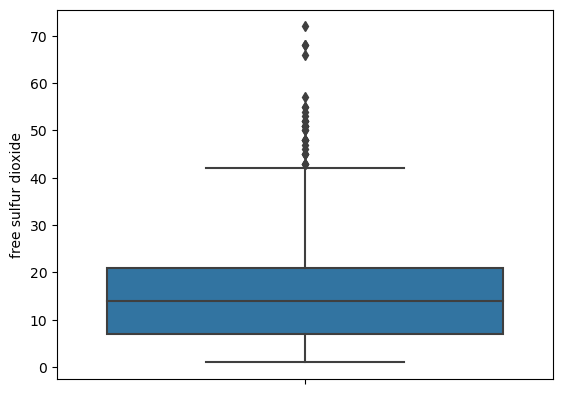

In [53]:
sns.boxplot(data=df, y='free sulfur dioxide')

<AxesSubplot:ylabel='total sulfur dioxide'>

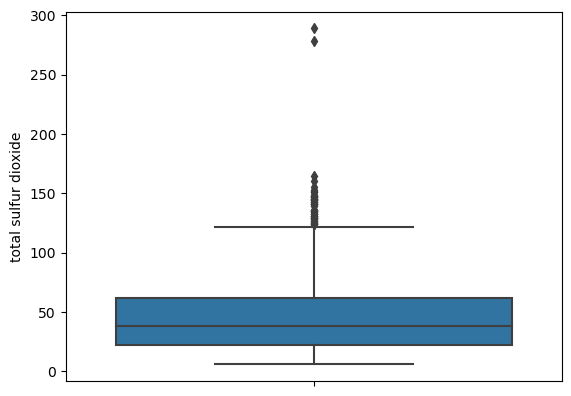

In [54]:
sns.boxplot(data=df, y='total sulfur dioxide')

<AxesSubplot:ylabel='density'>

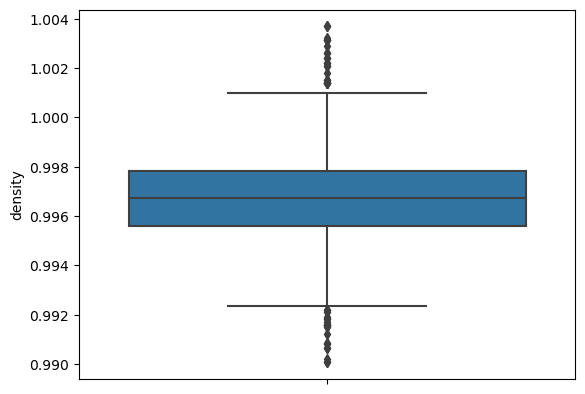

In [55]:
sns.boxplot(data=df, y='density')

<AxesSubplot:ylabel='pH'>

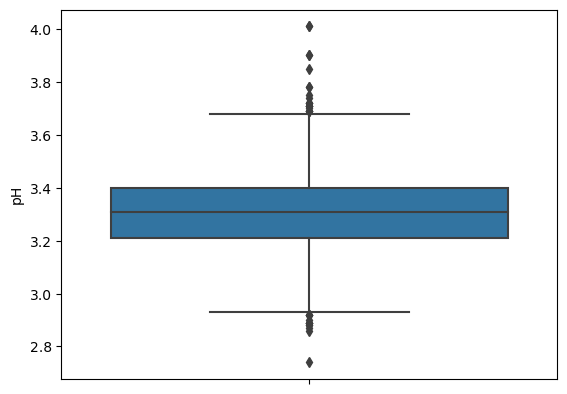

In [56]:
sns.boxplot(data=df, y='pH')

<AxesSubplot:ylabel='sulphates'>

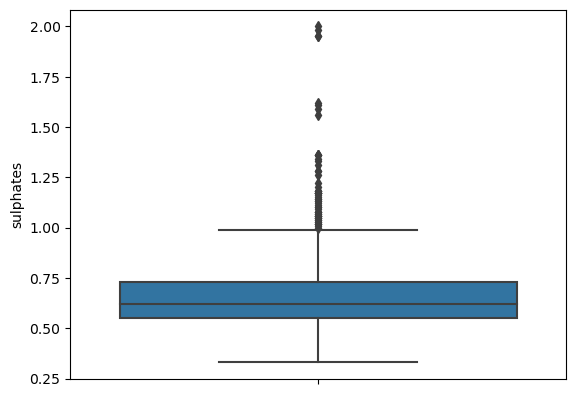

In [57]:
sns.boxplot(data=df, y='sulphates')

<AxesSubplot:ylabel='alcohol'>

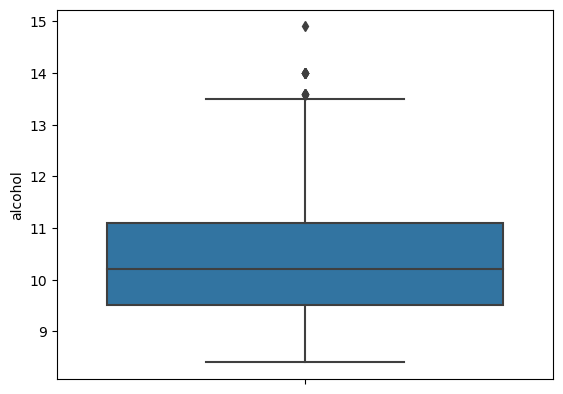

In [58]:
sns.boxplot(data=df, y='alcohol')

Almost every column have outliers

In [59]:
# Looking for z score
from scipy.stats import zscore
z=np.abs(zscore(df.iloc[:,:-2]))
z

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.528360          0.961877     1.391472        0.453218   0.243707   
1          0.298547          1.967442     1.391472        0.043416   0.223875   
2          0.298547          1.297065     1.186070        0.169427   0.096353   
3          1.654856          1.384443     1.484154        0.453218   0.264960   
4          0.528360          0.961877     1.391472        0.453218   0.243707   
...             ...               ...          ...             ...        ...   
1594       1.217796          0.403229     0.980669        0.382271   0.053845   
1595       1.390155          0.123905     0.877968        0.240375   0.541259   
1596       1.160343          0.099554     0.723916        0.169427   0.243707   
1597       1.390155          0.654620     0.775267        0.382271   0.264960   
1598       1.332702          1.216849     1.021999        0.752894   0.434990   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0                0.466193              0.379133  0.558274  1.288643   
1                0.872638              0.624363  0.028261  0.719933   
2                0.083669              0.229047  0.134264  0.331177   
3                0.107592              0.411500  0.664277  0.979104   
4                0.466193              0.379133  0.558274  1.288643   
...                   ...                   ...       ...       ...   
1594             1.542054              0.075043  0.978765  0.899886   
1595             2.211469              0.137820  0.862162  1.353436   
1596             1.255161              0.196679  0.533554  0.705508   
1597             1.542054              0.075043  0.676657  1.677400   
1598             0.203223              0.135861  0.666057  0.511130   

      sulphates   alcohol  
0      0.579207  0.960246  
1      0.128950  0.584777  
2      0.048089  0.584777  
3      0.461180  0.584777  
4      0.579207  0.960246  
...         ...       ...  
1594   0.461180  0.072294  
1595   0.601055  0.729364  
1596   0.542042  0.541630  
1597   0.305990  0.209308  
1598   0.010924  0.541630  

[1599 rows x 11 columns]

In [60]:
np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
         557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
         649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
         695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
         889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
        1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
        1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
        1270, 1270, 1288, 1289, 1295, 

In [61]:
#removing data above zscore and creating new dataset
df1=df[(z>3).all(axis=1)]
print("No Of rows in df1 :",df1.shape[0])
print("No of rows in df :",df.shape[0])

No Of rows in df1 : 0
No of rows in df : 1599


In [62]:
df1.shape

(0, 13)

If we with the process of removing outliers the we have found that all rows are removed. then we should do this process for model creating.

In [63]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
good quality            2.129363
dtype: float64

There is skewness present in residual sugar and chlorides to remove this skewness we may apply boxcox method

In [64]:
df1=df

In [65]:
df1['fixed acidity']=np.cbrt(df1['fixed acidity'])
df1['volatile acidity']=np.cbrt(df1['volatile acidity'])
df1['free sulfur dioxide']=np.cbrt(df1['free sulfur dioxide'])
df1['total sulfur dioxide']=np.cbrt(df1['total sulfur dioxide'])
df1['sulphates']=np.cbrt(df['sulphates'])
df1['chlorides']=np.cbrt(df1['chlorides'])
df1['residual sugar']=np.cbrt(df1['residual sugar'])
df1['alcohol']=np.cbrt(df1['alcohol'])
df1.skew()

fixed acidity           0.587668
volatile acidity       -0.070512
citric acid             0.318337
residual sugar          2.532201
chlorides               3.059529
free sulfur dioxide     0.247358
total sulfur dioxide    0.393746
density                 0.071288
pH                      0.193683
sulphates               1.322148
alcohol                 0.725907
quality                 0.217802
good quality            2.129363
dtype: float64

in cuberoot process we have seen that still there are skewness in the data set.

In [66]:
from scipy.stats import boxcox
df1['residual sugar']=boxcox(df1['residual sugar'],0.5)  # 0-> for logtransformation and 0.5 for squre root transformation
df1['chlorides']=boxcox(df1['chlorides'],0.5)
df1.skew()

fixed acidity           0.587668
volatile acidity       -0.070512
citric acid             0.318337
residual sugar          2.151166
chlorides               2.410058
free sulfur dioxide     0.247358
total sulfur dioxide    0.393746
density                 0.071288
pH                      0.193683
sulphates               1.322148
alcohol                 0.725907
quality                 0.217802
good quality            2.129363
dtype: float64

In [67]:
df1.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.264748     0.670553   
volatile acidity          -0.264748          1.000000    -0.566698   
citric acid                0.670553         -0.566698     1.000000   
residual sugar             0.163717          0.029410     0.169120   
chlorides                  0.178180          0.114450     0.187771   
free sulfur dioxide       -0.173739          0.017797    -0.080850   
total sulfur dioxide      -0.115392          0.093119     0.009224   
density                    0.673615          0.037685     0.364947   
pH                        -0.699735          0.229324    -0.541904   
sulphates                  0.196146         -0.288941     0.327678   
alcohol                   -0.082908         -0.222070     0.109388   
quality                    0.118123         -0.393764     0.226373   
good quality               0.115171         -0.290099     0.214716   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.163717   0.178180            -0.173739   
volatile acidity            0.029410   0.114450             0.017797   
citric acid                 0.169120   0.187771            -0.080850   
residual sugar              1.000000   0.105194             0.115914   
chlorides                   0.105194   1.000000            -0.009608   
free sulfur dioxide         0.115914  -0.009608             1.000000   
total sulfur dioxide        0.171006   0.069998             0.757872   
density                     0.409859   0.328388            -0.036124   
pH                         -0.091340  -0.284077             0.089701   
sulphates                   0.019100   0.271621             0.054612   
alcohol                     0.075505  -0.293845            -0.079680   
quality                     0.022156  -0.169321            -0.051243   
good quality                0.063305  -0.140736            -0.083075   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.115392  0.673615 -0.699735   0.196146   
volatile acidity                  0.093119  0.037685  0.229324  -0.288941   
citric acid                       0.009224  0.364947 -0.541904   0.327678   
residual sugar                    0.171006  0.409859 -0.091340   0.019100   
chlorides                         0.069998  0.328388 -0.284077   0.271621   
free sulfur dioxide               0.757872 -0.036124  0.089701   0.054612   
total sulfur dioxide              1.000000  0.095461 -0.031335   0.044914   
density                           0.095461  1.000000 -0.341699   0.161109   
pH                               -0.031335 -0.341699  1.000000  -0.168561   
sulphates                         0.044914  0.161109 -0.168561   1.000000   
alcohol                          -0.232059 -0.492844  0.206050   0.123558   
quality                          -0.180815 -0.174919 -0.057731   0.292537   
good quality                     -0.163429 -0.150460 -0.057283   0.226048   

                       alcohol   quality  good quality  
fixed acidity        -0.082908  0.118123      0.115171  
volatile acidity     -0.222070 -0.393764     -0.290099  
citric acid           0.109388  0.226373      0.214716  
residual sugar        0.075505  0.022156      0.063305  
chlorides            -0.293845 -0.169321     -0.140736  
free sulfur dioxide  -0.079680 -0.051243     -0.083075  
total sulfur dioxide -0.232059 -0.180815     -0.163429  
density              -0.492844 -0.174919     -0.150460  
pH                    0.206050 -0.057731     -0.057283  
sulphates             0.123558  0.292537      0.226048  
alcohol               1.000000  0.476928      0.406183  
quality               0.476928  1.000000      0.710196  
good quality          0.406183  0.710196      1.000000

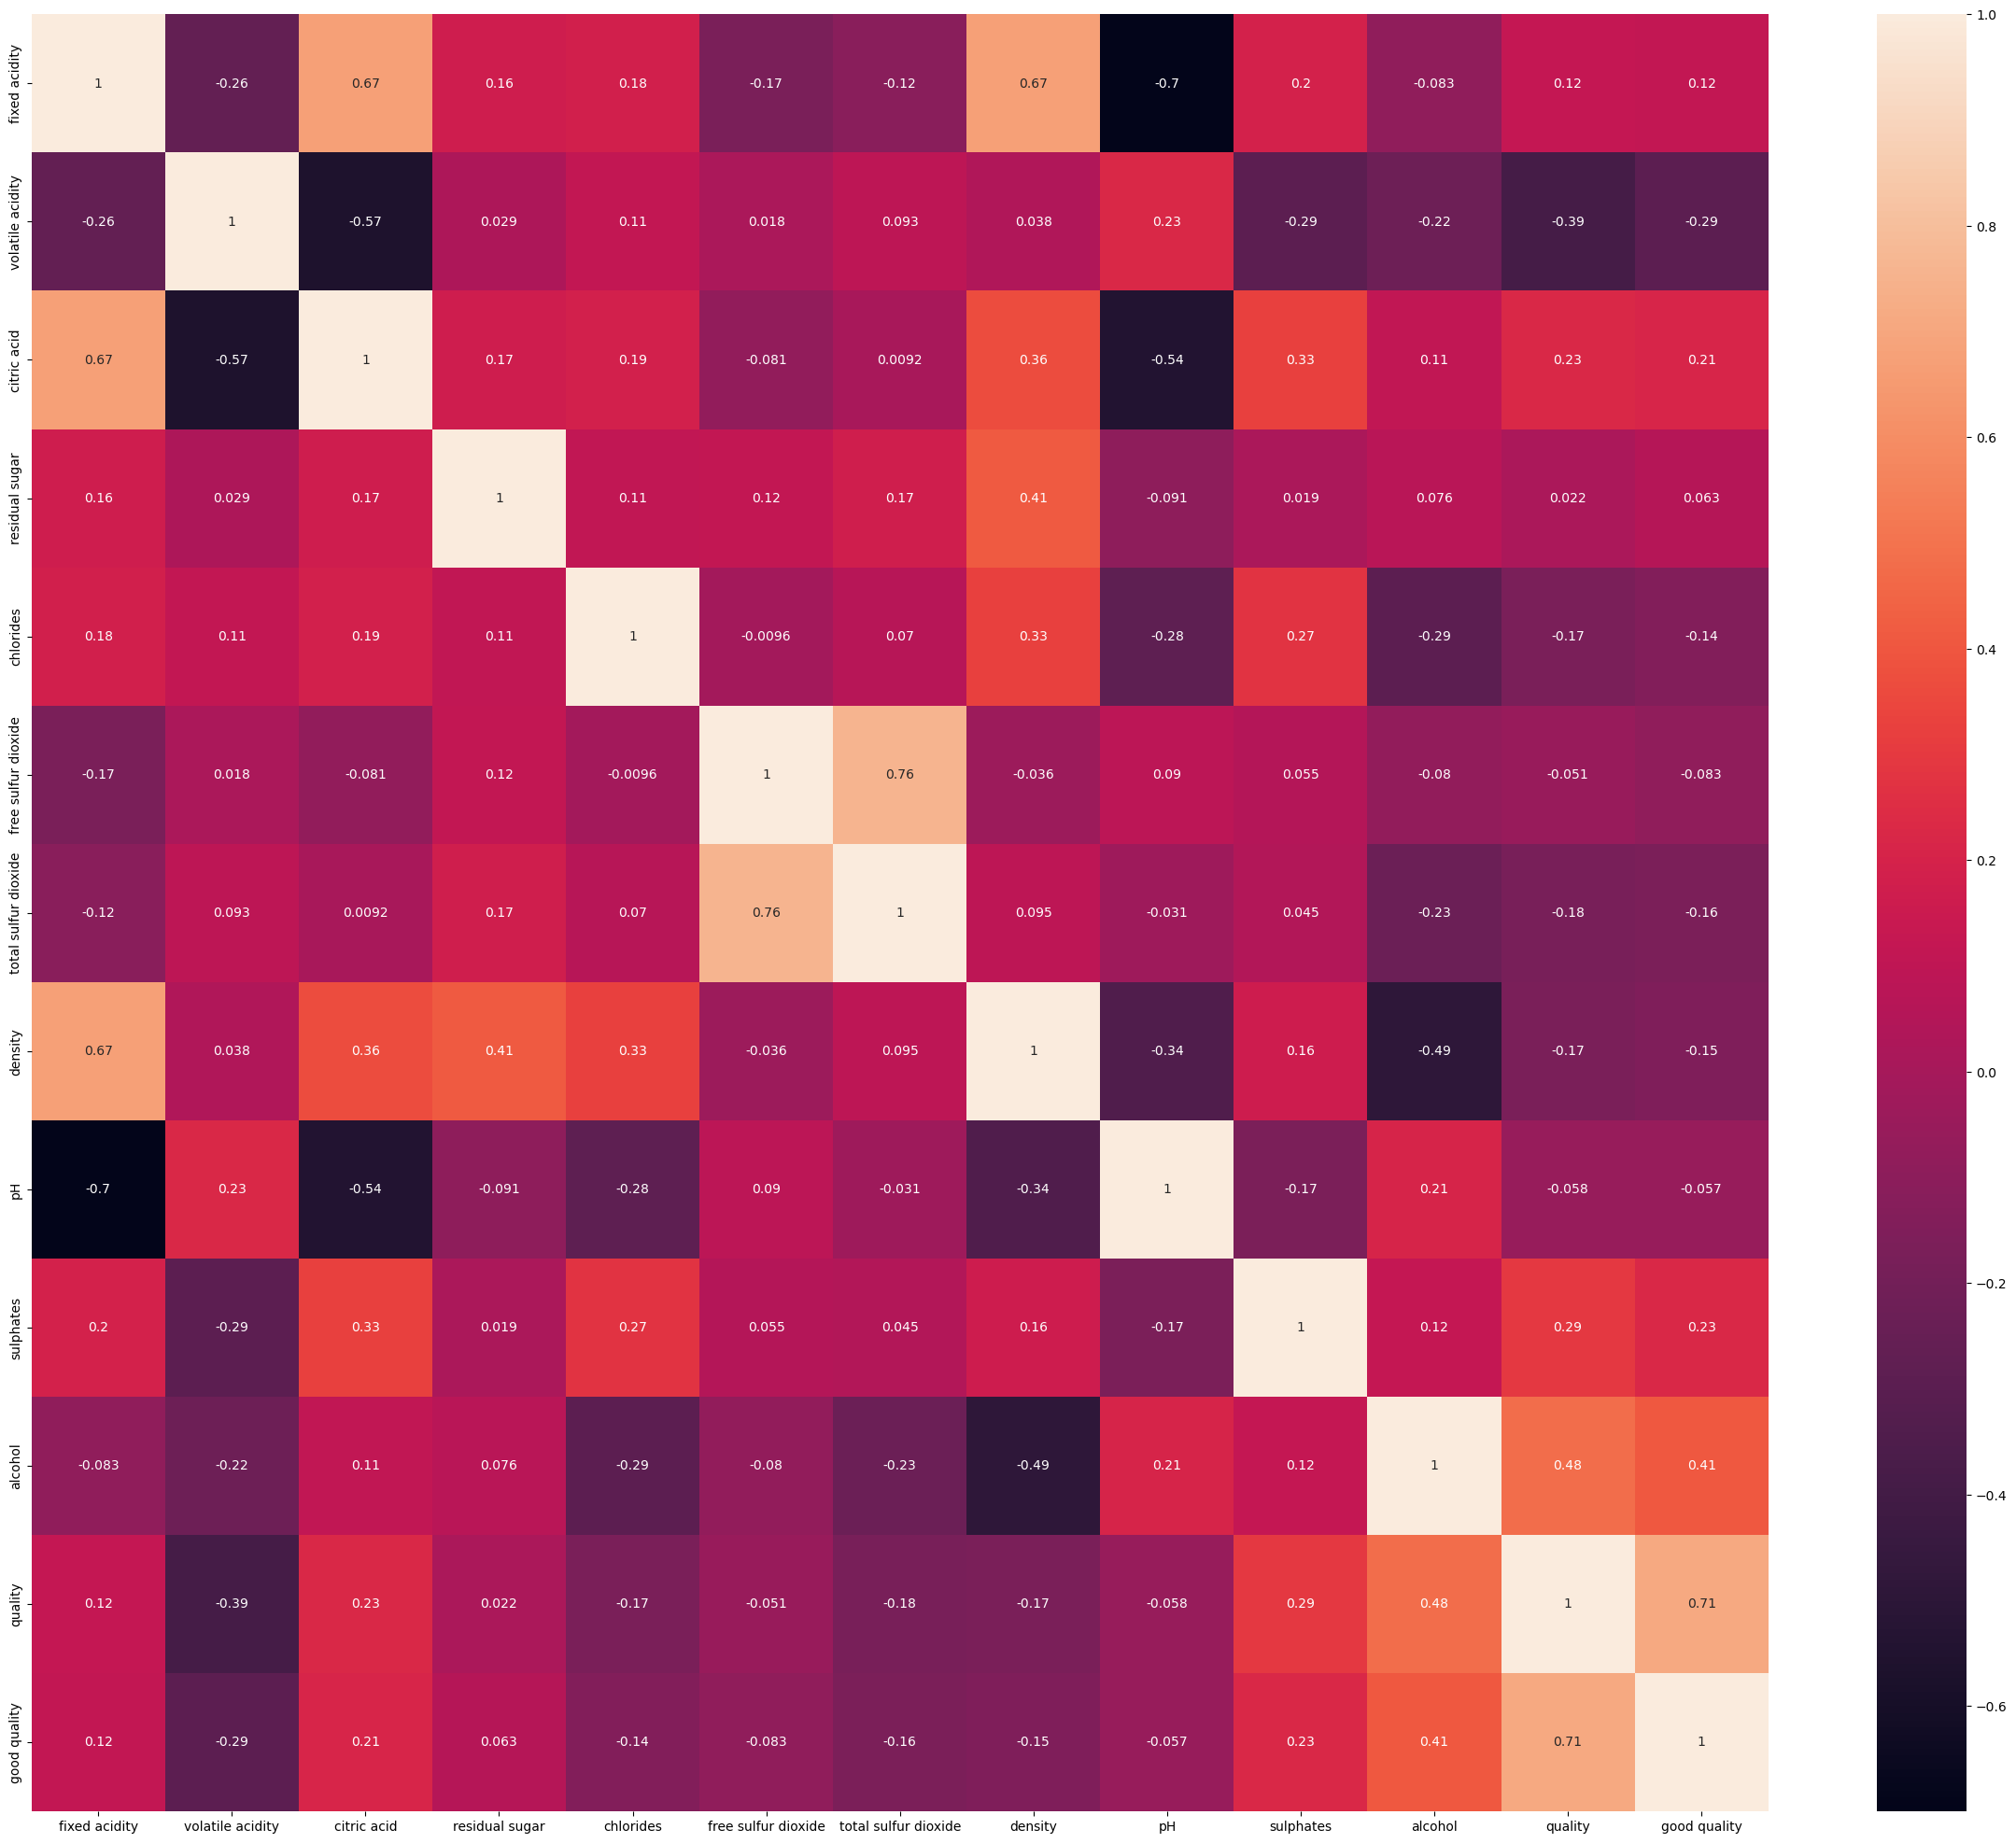

In [68]:
plt.figure(figsize=(30,25))
sns.heatmap(df1.corr(), annot=True)
plt.show()

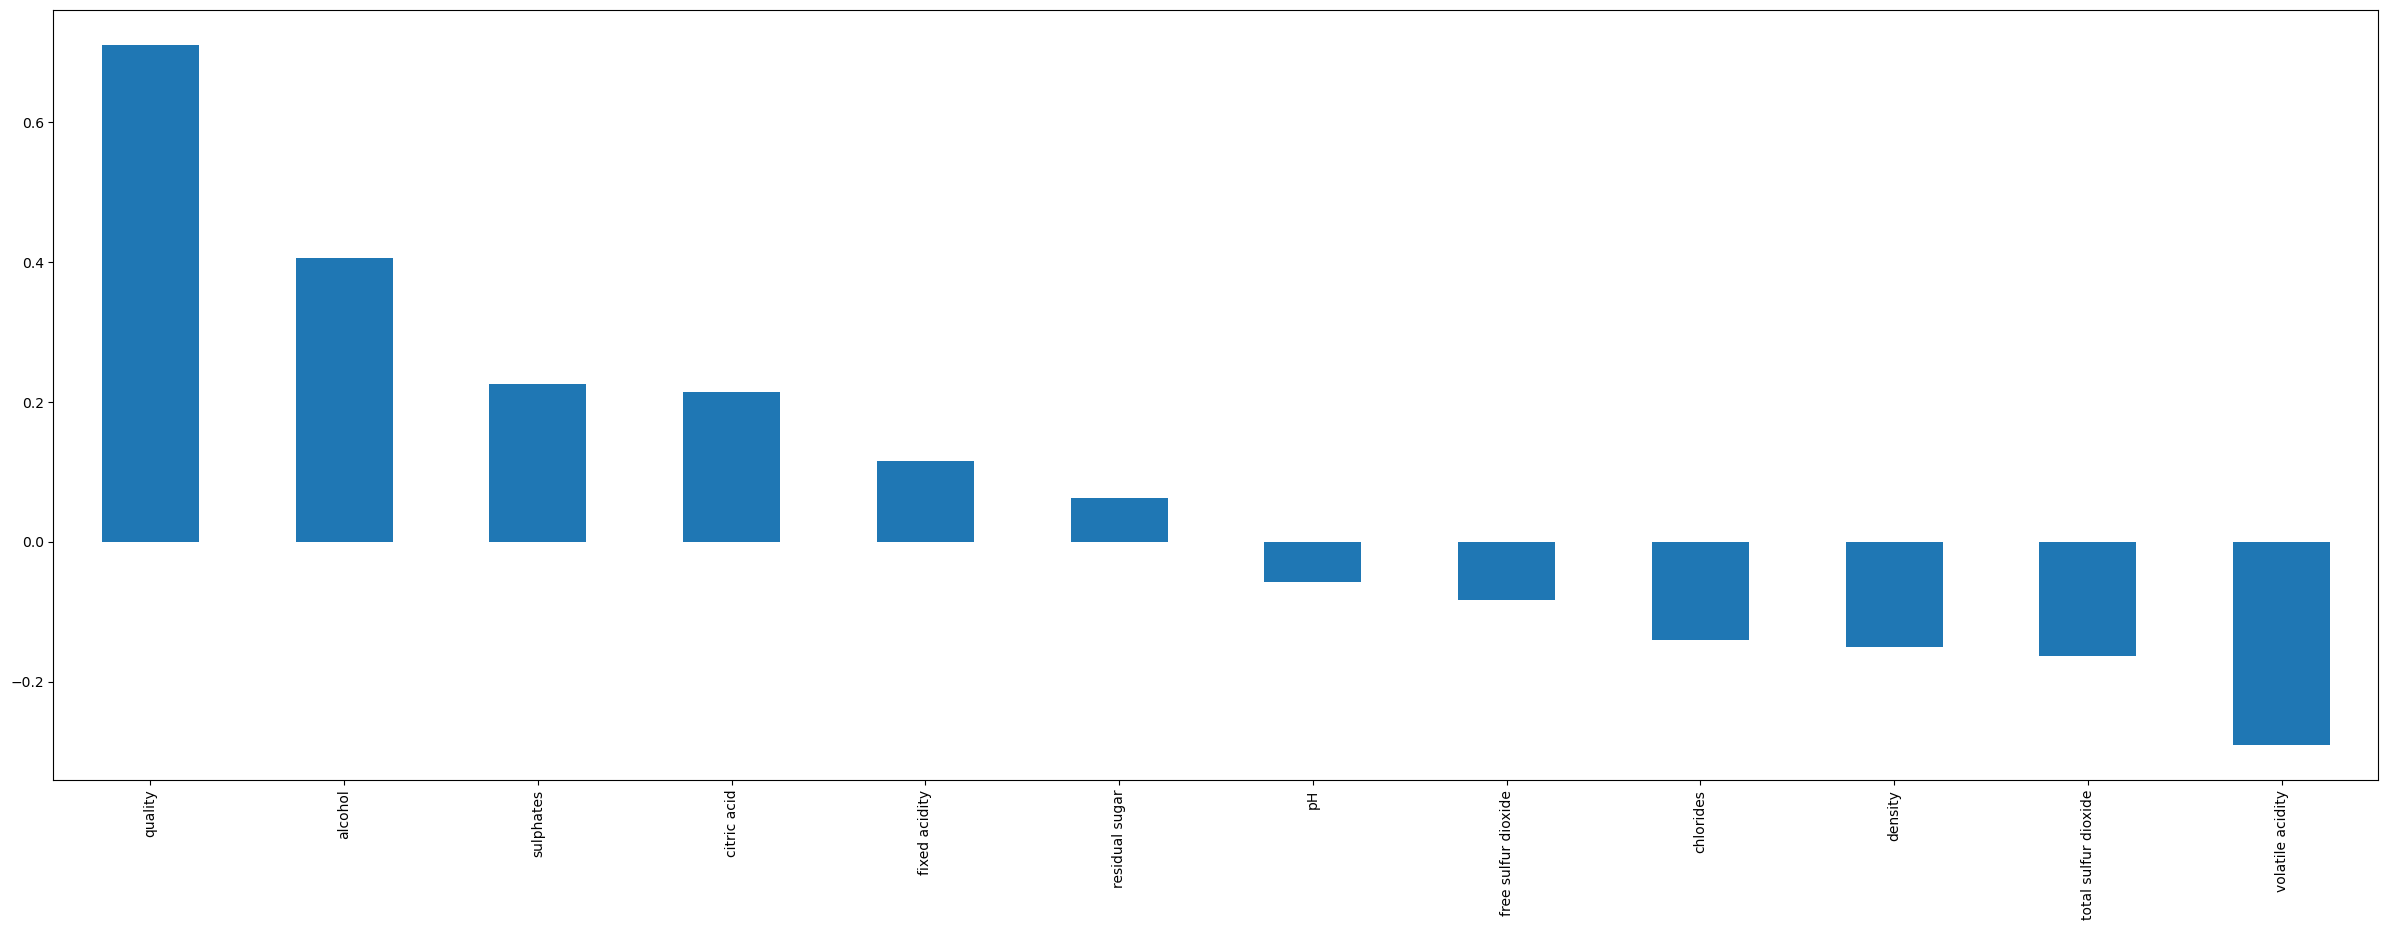

In [69]:
plt.figure(figsize=(30,10))
df1.corr()['good quality'].sort_values(ascending=False).drop(['good quality']).plot(kind='bar')

plt.show()

There are correlation shows in barplot acending in nature.

In [70]:
#Seperating feature and label
x=df1.iloc[:,:-2]
y=df1.iloc[:,-1]

In [71]:
print('Shape of x:',x.shape)
print('Shape of y:',y.shape)

Shape of x: (1599, 11)
Shape of y: (1599,)


In [72]:
#Feature Scaling using standard scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.502833          0.980285    -1.391472       -0.569596  -0.232397   
1         -0.249061          1.745223    -1.391472        0.251117   0.509704   
2         -0.249061          1.248486    -1.186070       -0.074800   0.322340   
3          1.620799         -1.559625     1.484154       -0.569596  -0.270205   
4         -0.502833          0.980285    -1.391472       -0.569596  -0.232397   
...             ...               ...          ...             ...        ...   
1594      -1.323829          0.496940    -0.980669       -0.438300   0.257620   
1595      -1.545413          0.234881    -0.877968       -0.191332  -0.804434   
1596      -1.251559          0.013548    -0.723916       -0.074800  -0.232397   
1597      -1.545413          0.720613    -0.775267       -0.438300  -0.270205   
1598      -1.470734         -1.314246     1.021999        1.149198  -0.588810   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               -0.323303             -0.217554  0.558274  1.288643   
1                0.983836              0.813317  0.028261 -0.719933   
2                0.129002              0.459903  0.134264 -0.331177   
3                0.325192              0.629351  0.664277 -0.979104   
4               -0.323303             -0.217554  0.558274  1.288643   
...                   ...                   ...       ...       ...   
1594             1.452110              0.147087 -0.978765  0.899886   
1595             1.856199              0.370437 -0.862162  1.353436   
1596             1.260746              0.008628 -0.533554  0.705508   
1597             1.452110              0.147087 -0.676657  1.677400   
1598             0.417546              0.078957 -0.666057  0.511130   

      sulphates   alcohol  
0     -0.601783 -0.983467  
1      0.221852 -0.577411  
2      0.025664 -0.577411  
3     -0.456840 -0.577411  
4     -0.601783 -0.983467  
...         ...       ...  
1594  -0.456840  0.107374  
1595   0.718264  0.762362  
1596   0.658180  0.578076  
1597   0.412352 -0.182260  
1598   0.091718  0.578076  

[1599 rows x 11 columns]

In [73]:
#Chacking Variance Inflatation Factor( VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF Value']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

Features  VIF Value
0          fixed acidity   8.230153
1       volatile acidity   1.865394
2            citric acid   3.075929
3         residual sugar   1.950062
4              chlorides   1.440141
5    free sulfur dioxide   2.584995
6   total sulfur dioxide   2.866970
7                density   7.455584
8                     pH   3.530425
9              sulphates   1.401321
10               alcohol   3.311493

As all the vif is less than 10 then we no need to drop any column.

In [74]:
y.value_counts()

0    1382
1     217
Name: good quality, dtype: int64

In [75]:
# Oversampling methods
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)
y1.value_counts()

0    1382
1    1382
Name: good quality, dtype: int64

### Modeling

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve

In [77]:
# lokking for best Random state
MaxRS=0
MaxAccu=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_test)
    accu=accuracy_score(y_test,pred)
    
    if accu>MaxAccu:
        MaxAccu=accu
        MaxRS=i
print(f"Best Accuracy is {MaxAccu} at Random State {MaxRS}")

Best Accuracy is 0.9590361445783132 at Random State 143


In [78]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=MaxRS)

In [79]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print('Accuracy Score in RFC :', accuracy_score(y_test,predrfc))
print("Confusion Matrix: ",confusion_matrix(y_test,predrfc))
print("Classification Report", classification_report(y_test,predrfc))

Accuracy Score in RFC : 0.9602409638554217
Confusion Matrix:  [[384  19]
 [ 14 413]]
Classification Report               precision    recall  f1-score   support

           0       0.96      0.95      0.96       403
           1       0.96      0.97      0.96       427

    accuracy                           0.96       830
   macro avg       0.96      0.96      0.96       830
weighted avg       0.96      0.96      0.96       830



In [80]:
et=ExtraTreesClassifier()
et.fit(x_train,y_train)
predet=et.predict(x_test)
print('Accuracy Score in ET :', accuracy_score(y_test,predet))
print("Confusion Matrix: ",confusion_matrix(y_test,predet))
print("Classification Report", classification_report(y_test,predet))

Accuracy Score in ET : 0.9722891566265061
Confusion Matrix:  [[384  19]
 [  4 423]]
Classification Report               precision    recall  f1-score   support

           0       0.99      0.95      0.97       403
           1       0.96      0.99      0.97       427

    accuracy                           0.97       830
   macro avg       0.97      0.97      0.97       830
weighted avg       0.97      0.97      0.97       830



In [81]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print('Accuracy Score in AdaBoost :', accuracy_score(y_test,predad))
print("Confusion Matrix: ",confusion_matrix(y_test,predad))
print("Classification Report", classification_report(y_test,predad))

Accuracy Score in AdaBoost : 0.8698795180722891
Confusion Matrix:  [[347  56]
 [ 52 375]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.86      0.87       403
           1       0.87      0.88      0.87       427

    accuracy                           0.87       830
   macro avg       0.87      0.87      0.87       830
weighted avg       0.87      0.87      0.87       830



In [82]:
bc=BaggingClassifier()
bc.fit(x_train,y_train)
predbc=bc.predict(x_test)
print('Accuracy Score in Bagging :', accuracy_score(y_test,predbc))
print("Confusion Matrix: ",confusion_matrix(y_test,predbc))
print("Classification Report", classification_report(y_test,predbc))

Accuracy Score in Bagging : 0.9289156626506024
Confusion Matrix:  [[375  28]
 [ 31 396]]
Classification Report               precision    recall  f1-score   support

           0       0.92      0.93      0.93       403
           1       0.93      0.93      0.93       427

    accuracy                           0.93       830
   macro avg       0.93      0.93      0.93       830
weighted avg       0.93      0.93      0.93       830



In [83]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print('Accuracy Score in LR :', accuracy_score(y_test,predlr))
print("Confusion Matrix: ",confusion_matrix(y_test,predlr))
print("Classification Report", classification_report(y_test,predlr))

Accuracy Score in LR : 0.8337349397590361
Confusion Matrix:  [[329  74]
 [ 64 363]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.82      0.83       403
           1       0.83      0.85      0.84       427

    accuracy                           0.83       830
   macro avg       0.83      0.83      0.83       830
weighted avg       0.83      0.83      0.83       830



In [84]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print('Accuracy Score in SVC :', accuracy_score(y_test,predsvc))
print("Confusion Matrix: ",confusion_matrix(y_test,predsvc))
print("Classification Report", classification_report(y_test,predsvc))

Accuracy Score in SVC : 0.8939759036144578
Confusion Matrix:  [[340  63]
 [ 25 402]]
Classification Report               precision    recall  f1-score   support

           0       0.93      0.84      0.89       403
           1       0.86      0.94      0.90       427

    accuracy                           0.89       830
   macro avg       0.90      0.89      0.89       830
weighted avg       0.90      0.89      0.89       830



In [85]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print('Accuracy Score in GNB :', accuracy_score(y_test,predgnb))
print("Confusion Matrix: ",confusion_matrix(y_test,predgnb))
print("Classification Report", classification_report(y_test,predgnb))

Accuracy Score in GNB : 0.8156626506024096
Confusion Matrix:  [[320  83]
 [ 70 357]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.79      0.81       403
           1       0.81      0.84      0.82       427

    accuracy                           0.82       830
   macro avg       0.82      0.82      0.82       830
weighted avg       0.82      0.82      0.82       830



In [86]:
sgdc=SGDClassifier()
sgdc.fit(x_train,y_train)
predsgdc=rfc.predict(x_test)
print('Accuracy Score in SGDC :', accuracy_score(y_test,predsgdc))
print("Confusion Matrix: ",confusion_matrix(y_test,predsgdc))
print("Classification Report", classification_report(y_test,predsgdc))

Accuracy Score in SGDC : 0.9602409638554217
Confusion Matrix:  [[384  19]
 [ 14 413]]
Classification Report               precision    recall  f1-score   support

           0       0.96      0.95      0.96       403
           1       0.96      0.97      0.96       427

    accuracy                           0.96       830
   macro avg       0.96      0.96      0.96       830
weighted avg       0.96      0.96      0.96       830



In [87]:
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
predknc=knc.predict(x_test)
print('Accuracy Score in KNC :', accuracy_score(y_test,predknc))
print("Confusion Matrix: ",confusion_matrix(y_test,predknc))
print("Classification Report", classification_report(y_test,predknc))

Accuracy Score in KNC : 0.8951807228915662
Confusion Matrix:  [[317  86]
 [  1 426]]
Classification Report               precision    recall  f1-score   support

           0       1.00      0.79      0.88       403
           1       0.83      1.00      0.91       427

    accuracy                           0.90       830
   macro avg       0.91      0.89      0.89       830
weighted avg       0.91      0.90      0.89       830



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [88]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Accuracy Score in DTC :', accuracy_score(y_test,preddtc))
print("Confusion Matrix: ",confusion_matrix(y_test,preddtc))
print("Classification Report", classification_report(y_test,preddtc))

Accuracy Score in DTC : 0.8975903614457831
Confusion Matrix:  [[364  39]
 [ 46 381]]
Classification Report               precision    recall  f1-score   support

           0       0.89      0.90      0.90       403
           1       0.91      0.89      0.90       427

    accuracy                           0.90       830
   macro avg       0.90      0.90      0.90       830
weighted avg       0.90      0.90      0.90       830



In [89]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print('Accuracy Score in GB :', accuracy_score(y_test,predgb))
print("Confusion Matrix: ",confusion_matrix(y_test,predgb))
print("Classification Report", classification_report(y_test,predgb))

Accuracy Score in GB : 0.9228915662650602
Confusion Matrix:  [[371  32]
 [ 32 395]]
Classification Report               precision    recall  f1-score   support

           0       0.92      0.92      0.92       403
           1       0.93      0.93      0.93       427

    accuracy                           0.92       830
   macro avg       0.92      0.92      0.92       830
weighted avg       0.92      0.92      0.92       830



from all of the classification model we have found that ExtraTreesClassifier() give us best accuracy score.

### Hyper parameter Tuning

In [90]:
from sklearn.model_selection import GridSearchCV
parameters={"criterion":['gini', 'entropy'],
            "random_state":[10,50,1000],
            "max_depth":[1,10,20],
            'n_jobs':[-2,-1,-1],
            "n_estimators":[50,100,200,300]}
GCV=GridSearchCV(ExtraTreesClassifier(),parameters, cv=5)

In [91]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, -1],
                         'random_state': [10, 50, 1000]})

In [92]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 50}

In [93]:
final_model=ExtraTreesClassifier(criterion= 'entropy',max_depth=20, n_estimators=50,n_jobs= -2, random_state=10)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print("Accuracy score of Final Model=",(accuracy_score(y_test,pred))*100)

Accuracy score of Final Model= 96.62650602409639


in this hyperparameter tuning there is not increased hare in accuracy of the model.

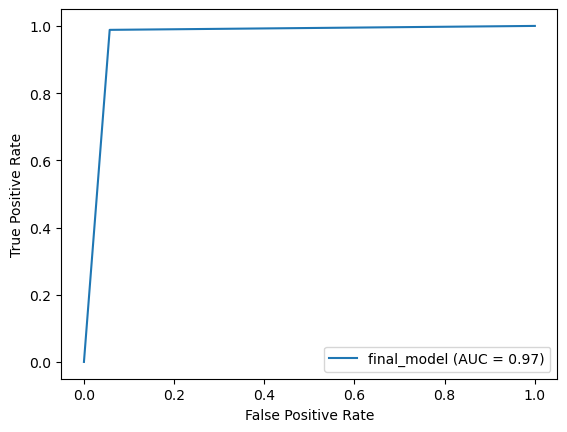

In [94]:
from sklearn import metrics
fpr,tpr,thresold=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='final_model')
display.plot()

Hare we have plotting the roc auc curve for the final model and auc value for the final model is 0.96.

### Saving the model

In [95]:
import joblib
joblib.dump(final_model,"Wine_Quality.pkl")

['Wine_Quality.pkl']

### predicting the saved model

In [96]:
model=joblib.load("Wine_Quality.pkl")

In [97]:
prediction=model.predict(x_test)
winequality_df=pd.DataFrame()
winequality_df['Actual Value']=y_test
winequality_df["Predicted Value"]= prediction

In [98]:
winequality_df

Actual Value  Predicted Value
324              0                0
2267             1                1
2063             1                1
283              1                1
2408             1                1
...            ...              ...
51               0                0
597              0                0
2189             1                1
2758             1                1
335              1                1

[830 rows x 2 columns]